In [69]:
'''

Group: Baseball Data Minin$
Team: 
    - Jorge Moreno
    - Paris Dinh
    - Stefano Delpiccolo
Class
    - CSCI 4502 CU Boulder Fall 2019
Notes:
    -Had issues with some packages
        -Using numpy version 1.17.4   (Resolved issues with quantile function)
        -Scipy version 1.2  (Resolved Issues with Facotrial function)
        
Special packages - downloadable through pip:
    -pybaseball
    -efficient_apriori  -
    
Files to include in Directory:
    -master.csv
    -Batting.csv
    -optional TBB.ipynb: Shows how we got our statistic 
'''

import pandas as pd
import numpy as np
##  This is the baseball libary we use
from pybaseball.lahman import *
from pybaseball import bwar_bat
from pybaseball import batting_stats
from pybaseball import *
from efficient_apriori import apriori
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from math import pow

In [2]:
#MLBID and Total Bases Batted Dictionary
#Outcome from TBB notebook where Stat was calculated. See Write up for more info
batters = {451594.0: 1727, 518792.0: 1695, 450314.0: 1877, 516416.0: 2015, 605113.0: 769, 502671.0: 1919, 444482.0: 468, 571875.0: 1624, 630111.0: 1560, 519203.0: 2007, 592178.0: 2084, 656941.0: 59, 572008.0: 1278, 523989.0: 43, 600303.0: 444, 471083.0: 805, 456078.0: 1251, 608365.0: 1733, 407793.0: 157, 593647.0: 242, 519333.0: 538, 592273.0: 1386, 467008.0: 3, 624585.0: 717, 430001.0: 551, 594809.0: 1975, 466320.0: 1769, 547989.0: 1850, 453943.0: 1750, 542993.0: 884, 476704.0: 999, 502210.0: 1277, 502143.0: 1400, 541645.0: 1226, 543776.0: 637, 543434.0: 1006, 519390.0: 1468, 458085.0: 838, 475174.0: 1414, 425900.0: 920, 573135.0: 876, 543760.0: 1674, 424825.0: 1511, 518911.0: 1, 592192.0: 104, 501981.0: 1590, 514888.0: 2071, 543807.0: 2093, 621043.0: 1850, 453056.0: 1727, 458731.0: 1734, 121347.0: 618, 458675.0: 1076, 460576.0: 1275, 472528.0: 907, 643603.0: 704, 605512.0: 355, 456124.0: 225, 407893.0: 1151, 435263.0: 1331, 452104.0: 1417, 516770.0: 1642, 544369.0: 1593, 136860.0: 1614, 503556.0: 1390, 592274.0: 4, 400284.0: 1691, 608369.0: 2057, 624577.0: 996, 452655.0: 1858, 605412.0: 1457, 457763.0: 1726, 408236.0: 1736, 475100.0: 293, 592626.0: 1359, 571771.0: 671, 605131.0: 93, 622072.0: 48, 452254.0: 1259, 474832.0: 1820, 622110.0: 939, 543063.0: 1736, 408241.0: 70, 434636.0: 1505, 605509.0: 341, 501303.0: 197, 408307.0: 206, 453923.0: 690, 518586.0: 189, 572821.0: 1947, 542454.0: 685, 408045.0: 1585, 593934.0: 1346, 461858.0: 948, 572073.0: 738, 460099.0: 612, 592518.0: 1893, 448801.0: 1802, 592696.0: 927, 500871.0: 1025, 571974.0: 221, 621439.0: 868, 444432.0: 1800, 429666.0: 1153, 476883.0: 989, 570731.0: 1728, 543376.0: 335, 520471.0: 1626, 546318.0: 1851, 596748.0: 1736, 429667.0: 1034, 594988.0: 792, 553993.0: 1751, 458015.0: 1924, 433217.0: 605, 501986.0: 81, 434563.0: 664, 488721.0: 1050, 594807.0: 1667, 457803.0: 1582, 457574.0: 154, 450203.0: 17, 474443.0: 682, 571466.0: 1160, 596112.0: 22, 519023.0: 121, 519085.0: 18, 534627.0: 571, 573131.0: 214, 543829.0: 936, 542303.0: 1592, 592885.0: 1745, 519317.0: 1200, 592663.0: 1517, 588751.0: 1374, 572191.0: 639, 543685.0: 1824, 547180.0: 1773, 475582.0: 1215, 502517.0: 1730, 467092.0: 1466, 543045.0: 113, 457787.0: 1627, 543699.0: 176, 445988.0: 1781, 571506.0: 837, 475479.0: 32, 150029.0: 1769, 452220.0: 470, 457768.0: 3, 502317.0: 411, 500743.0: 562, 544925.0: 107, 592261.0: 524, 425783.0: 567, 425902.0: 939, 435622.0: 1931, 488862.0: 1575, 502226.0: 91, 545361.0: 1884, 405395.0: 1699, 519048.0: 1358, 596059.0: 1762, 462101.0: 1590, 455139.0: 457, 543068.0: 1222, 594777.0: 1824, 592743.0: 1322, 134181.0: 1781, 434567.0: 224, 543213.0: 985, 596847.0: 337, 542208.0: 791, 605141.0: 2081, 456030.0: 2031, 593428.0: 1948, 607680.0: 1615, 518626.0: 2036, 430832.0: 1462, 429665.0: 1952, 453064.0: 1507, 120074.0: 1787, 434670.0: 1731, 543768.0: 1377, 571788.0: 878, 452672.0: 280, 431145.0: 1506, 572365.0: 499, 446381.0: 849, 459431.0: 1514, 598265.0: 1716, 475253.0: 894, 424325.0: 580, 434628.0: 160, 592662.0: 155, 594838.0: 671, 434658.0: 1474, 543401.0: 2074, 596019.0: 1995, 435063.0: 1829, 543228.0: 700, 407781.0: 337, 276519.0: 398, 346874.0: 675, 608070.0: 1871, 467793.0: 2093, 488671.0: 523, 457706.0: 520, 543742.0: 152, 570267.0: 765, 571697.0: 1427, 460075.0: 1568, 518960.0: 1443, 474892.0: 1714, 431094.0: 1116, 488771.0: 1032, 545350.0: 838, 542340.0: 1954, 502624.0: 122, 542979.0: 647, 444857.0: 4, 543590.0: 1033, 457759.0: 1800, 454560.0: 487, 548389.0: 62, 623143.0: 504, 430912.0: 73, 444876.0: 1909, 519058.0: 321, 456715.0: 1228, 543333.0: 1846, 666560.0: 604, 435559.0: 986, 434778.0: 1711, 460086.0: 1325, 521692.0: 1470, 408299.0: 385, 571681.0: 115, 435079.0: 1890, 457708.0: 1629, 408234.0: 1845, 400121.0: 1583, 502110.0: 1373, 554429.0: 192, 592206.0: 1127, 543510.0: 942, 578428.0: 1424, 543305.0: 951, 519222.0: 493, 543238.0: 237, 493114.0: 1260, 606466.0: 1198, 455104.0: 858, 429711.0: 763, 493193.0: 864, 547982.0: 1498, 429664.0: 1941, 443558.0: 1764, 572122.0: 1767, 452234.0: 1201, 452252.0: 1136, 514917.0: 1735, 434158.0: 1712, 431151.0: 432, 493316.0: 1488, 446263.0: 426, 519237.0: 1168, 624424.0: 894, 452678.0: 1504, 518595.0: 716, 594798.0: 108, 502034.0: 122, 595191.0: 152, 435522.0: 1240, 527038.0: 888, 493472.0: 224, 595963.0: 598, 444379.0: 1186, 457705.0: 1790, 501896.0: 1332, 446359.0: 1435, 408252.0: 1574, 570256.0: 1542, 543281.0: 1419, 474568.0: 1571, 434538.0: 109, 430580.0: 40, 571740.0: 1251, 516782.0: 1459, 465041.0: 1038, 502676.0: 64, 459964.0: 795, 445055.0: 1088, 605486.0: 133, 461314.0: 1805, 453568.0: 1827, 596115.0: 1115, 471865.0: 1710, 571448.0: 1892, 571976.0: 1915, 500208.0: 1259, 519083.0: 1175, 493351.0: 1387, 425834.0: 1475, 460026.0: 865, 518934.0: 1775, 467827.0: 1024, 448602.0: 1227, 607067.0: 91, 543734.0: 82, 572362.0: 16, 488681.0: 273, 518466.0: 214, 572019.0: 262, 572761.0: 1573, 572039.0: 1764, 407812.0: 1148, 571431.0: 895, 542255.0: 1593, 430947.0: 1185, 425877.0: 1620, 543939.0: 913, 576397.0: 1176, 455976.0: 1886, 493343.0: 36, 452095.0: 887, 493596.0: 773, 448802.0: 134, 605538.0: 117, 453211.0: 243, 518692.0: 1885, 611177.0: 1539, 545341.0: 1252, 571757.0: 591, 649557.0: 1252, 594824.0: 695, 430637.0: 873, 523253.0: 1562, 489149.0: 1061, 446334.0: 1808, 572816.0: 1446, 457775.0: 581, 543543.0: 1655, 519306.0: 1265, 595281.0: 1099, 474233.0: 362, 446308.0: 1243, 475247.0: 481, 537953.0: 382, 460060.0: 530, 485567.0: 934, 467055.0: 25, 489365.0: 340, 628329.0: 23, 596119.0: 176, 499624.0: 51, 543294.0: 178, 425844.0: 133, 476589.0: 11, 518577.0: 28, 450729.0: 18, 503449.0: 86, 592680.0: 186, 570717.0: 755, 595023.0: 158, 477132.0: 154, 518516.0: 244, 572204.0: 673, 608672.0: 14, 542455.0: 606, 449181.0: 1349, 456488.0: 1688, 591720.0: 453, 449107.0: 472, 112526.0: 139, 592826.0: 114, 457477.0: 722, 628452.0: 22, 543037.0: 106, 434604.0: 12, 430605.0: 657, 407822.0: 111, 519141.0: 96, 542436.0: 717, 489267.0: 683, 453646.0: 10, 608671.0: 1053, 542194.0: 579, 547172.0: 627, 461235.0: 1219, 593372.0: 169, 607054.0: 1129, 527054.0: 141, 150229.0: 661, 425796.0: 859, 518700.0: 369, 607387.0: 703, 592407.0: 343, 455759.0: 584, 453562.0: 199, 543302.0: 447, 571946.0: 90, 493128.0: 78, 455117.0: 676, 572971.0: 6, 519076.0: 125, 431148.0: 116, 456501.0: 172, 519208.0: 593, 605452.0: 111, 543408.0: 138, 453400.0: 718, 518618.0: 1138, 518568.0: 455, 596146.0: 1214, 572033.0: 214, 502182.0: 210, 476451.0: 162, 608700.0: 412, 518774.0: 56, 455755.0: 277, 502046.0: 93, 543532.0: 4, 573185.0: 157, 448306.0: 57, 518452.0: 134, 554234.0: 41, 425794.0: 187, 572096.0: 1, 456665.0: 797, 547957.0: 953, 592200.0: 705, 446386.0: 1077, 608577.0: 1521, 593643.0: 155, 605480.0: 633, 502032.0: 90, 453286.0: 211, 605232.0: 145, 452657.0: 212, 460077.0: 361, 456714.0: 753, 543054.0: 50, 570663.0: 5, 501571.0: 414, 400085.0: 1026, 608379.0: 91, 543380.0: 13, 446481.0: 952, 607385.0: 432, 457454.0: 748, 477165.0: 738, 506560.0: 430, 605400.0: 75, 488768.0: 96, 592592.0: 121, 596143.0: 537, 435062.0: 1525, 628317.0: 156, 518735.0: 1356, 446653.0: 318, 461829.0: 156, 468504.0: 24, 594828.0: 1411, 592789.0: 173, 425772.0: 338, 605228.0: 152, 543022.0: 149, 502188.0: 180, 502190.0: 134, 572102.0: 21, 571980.0: 1104, 285064.0: 52, 572888.0: 6, 548337.0: 42, 543475.0: 17, 544931.0: 133, 593495.0: 358, 430945.0: 1856, 547379.0: 668, 435064.0: 683, 461865.0: 524, 519455.0: 14, 612672.0: 103, 542921.0: 588, 607776.0: 327, 543877.0: 485, 501936.0: 3, 429780.0: 6, 595879.0: 1415, 572863.0: 202, 548357.0: 8, 542364.0: 563, 477003.0: 75, 571578.0: 132, 621209.0: 14, 504379.0: 42, 605200.0: 150, 593523.0: 188, 605151.0: 125, 592710.0: 143, 518953.0: 224, 514913.0: 202, 502481.0: 942, 543901.0: 15, 502028.0: 4, 543548.0: 6, 593871.0: 763, 457789.0: 141, 543456.0: 4, 502082.0: 1284, 433589.0: 18, 621281.0: 6, 445060.0: 12, 502100.0: 352, 543746.0: 6, 592351.0: 129, 543216.0: 627, 502043.0: 15, 543859.0: 2, 595386.0: 96, 453265.0: 2, 517369.0: 114, 571561.0: 3, 461833.0: 6, 571927.0: 112, 570714.0: 25, 502457.0: 5, 608648.0: 5, 472551.0: 3, 594951.0: 3, 424144.0: 12, 594760.0: 53, 502285.0: 136, 519144.0: 13, 488726.0: 129, 519263.0: 8, 456034.0: 19, 518625.0: 32, 592593.0: 62, 572750.0: 43, 516949.0: 155, 570560.0: 457, 541650.0: 1186, 543148.0: 80, 600474.0: 122, 605388.0: 89, 446372.0: 19, 458678.0: 2, 545333.0: 16, 425784.0: 570, 534947.0: 65, 517593.0: 12, 453203.0: 308, 643297.0: 3, 570632.0: 57, 458582.0: 89, 592314.0: 100, 488818.0: 728, 450308.0: 21, 476570.0: 3, 501888.0: 24, 543105.0: 779, 448855.0: 101, 607374.0: 6, 543424.0: 55, 502261.0: 156, 449168.0: 7, 502327.0: 6, 541608.0: 509, 605253.0: 12, 571882.0: 2, 460269.0: 396, 572788.0: 12, 628356.0: 1005, 544928.0: 7, 519184.0: 1068, 457926.0: 84, 596144.0: 1373, 518991.0: 28, 518542.0: 538, 502239.0: 29, 475243.0: 39, 434671.0: 6, 592325.0: 162, 592717.0: 21, 592620.0: 404, 542992.0: 17, 605242.0: 4, 606131.0: 99, 457918.0: 27, 545358.0: 38, 453895.0: 41, 573186.0: 18, 285079.0: 1, 425856.0: 3, 570615.0: 251, 596142.0: 632, 571830.0: 921, 527043.0: 798, 463610.0: 617, 518614.0: 830, 543184.0: 97, 606299.0: 701, 572309.0: 1, 519301.0: 9, 473724.0: 133, 543272.0: 12, 425626.0: 3, 502523.0: 629, 492841.0: 295, 456422.0: 1177, 593700.0: 86, 533167.0: 4, 501625.0: 1, 457727.0: 1103, 643338.0: 9, 600301.0: 253, 501381.0: 3, 517370.0: 487, 608703.0: 247, 593160.0: 914, 605182.0: 6, 592567.0: 56, 643393.0: 385, 543135.0: 14, 458708.0: 22, 502522.0: 3, 519295.0: 840, 547874.0: 5, 592731.0: 158, 543257.0: 1098, 542908.0: 652, 608701.0: 463, 571970.0: 361, 433587.0: 20, 621199.0: 5, 518883.0: 2, 543391.0: 8, 434442.0: 4, 489119.0: 30, 543484.0: 488, 517448.0: 11, 621035.0: 183, 519043.0: 86, 592419.0: 133, 608336.0: 80, 502211.0: 20, 642229.0: 17, 571841.0: 204, 543606.0: 10, 581527.0: 1225, 518649.0: 571, 592230.0: 231, 628711.0: 74, 552662.0: 51, 595777.0: 842, 598284.0: 190, 544150.0: 56, 518715.0: 3, 500779.0: 6, 542674.0: 6, 543521.0: 19, 546276.0: 6, 425766.0: 984, 502009.0: 13, 621121.0: 8, 456068.0: 3, 458006.0: 3, 425657.0: 3, 572020.0: 9, 407908.0: 7, 506747.0: 116, 605125.0: 604, 474319.0: 124, 607208.0: 1001, 517414.0: 4, 605183.0: 152, 592835.0: 57, 488810.0: 27, 545338.0: 533, 502042.0: 14, 506702.0: 816, 546991.0: 342, 640455.0: 4, 425509.0: 804, 476633.0: 25, 592791.0: 71, 534910.0: 3, 641313.0: 1174, 543243.0: 5, 543101.0: 113, 592239.0: 70, 455369.0: 220, 643327.0: 52, 596043.0: 15, 605304.0: 10, 607231.0: 18, 608665.0: 11, 542881.0: 106, 623395.0: 3, 519445.0: 101, 461416.0: 45, 572114.0: 943, 490063.0: 70, 477195.0: 37, 571963.0: 3, 595001.0: 26, 501697.0: 7, 467100.0: 63, 543094.0: 139, 462136.0: 15, 571871.0: 3, 430935.0: 16, 430661.0: 8, 431171.0: 255, 501822.0: 19, 444468.0: 1, 607259.0: 6, 502054.0: 498, 621107.0: 51, 607732.0: 46, 575929.0: 926, 527048.0: 11, 518560.0: 50, 466988.0: 129, 571918.0: 37, 453178.0: 7, 571553.0: 68, 518633.0: 18, 607359.0: 6, 534606.0: 11, 570489.0: 41, 518490.0: 170, 519344.0: 1, 624428.0: 459, 642003.0: 31, 516809.0: 102, 607223.0: 361, 641771.0: 55, 607043.0: 233, 623166.0: 3, 547179.0: 18, 592433.0: 30, 608717.0: 2, 591693.0: 2, 434622.0: 12, 543118.0: 1, 571710.0: 4, 518653.0: 256, 608337.0: 11, 460283.0: 1, 425492.0: 2, 456071.0: 2, 451596.0: 17, 605218.0: 3, 503444.0: 45, 450172.0: 8, 430910.0: 30, 592779.0: 30, 279571.0: 12, 432934.0: 3, 571602.0: 9, 502205.0: 114, 572287.0: 534, 449173.0: 17, 600869.0: 40, 501659.0: 563, 435221.0: 36, 570649.0: 9, 518716.0: 7, 488912.0: 266, 573627.0: 496, 501957.0: 5, 408314.0: 785, 519025.0: 82, 643230.0: 25, 543706.0: 53, 592332.0: 10, 645848.0: 13, 430603.0: 72, 519421.0: 52, 607192.0: 21, 502374.0: 4, 516910.0: 3, 605137.0: 426, 542513.0: 37, 592808.0: 389, 491696.0: 85, 491708.0: 1, 453172.0: 3, 451705.0: 118, 571912.0: 332, 408047.0: 602, 489232.0: 326, 592387.0: 772, 570481.0: 47, 595025.0: 11, 506433.0: 8, 474521.0: 3, 553882.0: 340, 502273.0: 58, 553878.0: 3, 429719.0: 77, 592767.0: 6, 625643.0: 33, 605483.0: 7, 542882.0: 3, 474865.0: 36, 622194.0: 280, 595307.0: 3, 553869.0: 8, 640463.0: 76, 621311.0: 657, 608324.0: 615, 609275.0: 415, 605227.0: 71, 519168.0: 10, 519242.0: 18, 571437.0: 641, 602922.0: 73, 501992.0: 3, 628338.0: 303, 594694.0: 188, 448605.0: 71, 425532.0: 6, 607457.0: 3, 456701.0: 22, 621559.0: 6, 621242.0: 4, 444489.0: 214, 282332.0: 3, 643217.0: 358, 605508.0: 4, 501255.0: 11, 606115.0: 579, 547888.0: 3, 573113.0: 169, 572128.0: 144, 547007.0: 21, 607309.0: 6, 472610.0: 2, 453214.0: 7, 433584.0: 7, 593958.0: 6, 594795.0: 3, 622097.0: 32, 571718.0: 138, 520980.0: 1, 574847.0: 221, 456167.0: 5, 591712.0: 26, 608061.0: 299, 519082.0: 57, 605164.0: 6, 643354.0: 3, 607074.0: 2, 606192.0: 309, 553988.0: 32, 502544.0: 260, 451661.0: 2, 596133.0: 33, 621052.0: 37, 592122.0: 244, 592450.0: 247, 435180.0: 53, 605894.0: 3, 453385.0: 36, 543557.0: 32, 430641.0: 1, 429722.0: 8, 571745.0: 323, 621020.0: 386, 489305.0: 198, 607625.0: 42, 623182.0: 77, 656546.0: 24, 474463.0: 9, 640461.0: 153, 642239.0: 9, 493329.0: 368, 471822.0: 1, 605397.0: 2, 607229.0: 39, 502706.0: 4, 491676.0: 171, 448179.0: 38, 572041.0: 127, 506924.0: 159, 518875.0: 3, 446321.0: 5, 553883.0: 3, 611093.0: 3, 595918.0: 21, 594943.0: 1, 607257.0: 20, 592811.0: 4, 606160.0: 10, 502582.0: 199, 592444.0: 66, 605222.0: 9, 621563.0: 300, 607345.0: 44, 608596.0: 150, 606132.0: 129, 660162.0: 49, 492802.0: 46, 543329.0: 65, 571812.0: 114, 592254.0: 8, 454975.0: 118, 592647.0: 6, 608348.0: 34, 453329.0: 9, 544725.0: 136, 500874.0: 68, 608566.0: 22, 642162.0: 59, 641958.0: 60, 572180.0: 52, 594742.0: 28, 497807.0: 3, 543308.0: 13, 571800.0: 3, 503437.0: 64, 465753.0: 72, 444843.0: 88, 608325.0: 30, 596451.0: 175, 446192.0: 22, 542583.0: 16, 621566.0: 80, 600524.0: 37, 641531.0: 61, 595751.0: 38, 596129.0: 35, 571863.0: 16, 503351.0: 22, 592863.0: 78, 621244.0: 3, 570639.0: 10, 605439.0: 63, 592866.0: 10, 493200.0: 4, 518567.0: 18, 593679.0: 9, 456781.0: 61, 641820.0: 42, 595345.0: 3, 641319.0: 79, 592669.0: 102, 578570.0: 39, 622534.0: 110, 595978.0: 64, 500887.0: 12, 519294.0: 3, 547004.0: 16, 621389.0: 12, 605396.0: 1, 458913.0: 3, 594772.0: 3, 596057.0: 6, 434378.0: 4, 571851.0: 3, 445276.0: 2, 547973.0: 4}

In [3]:
# this pulls the batting data for the year 2016
data = bwar_bat()
data = data.loc[(data["year_ID"] == 2016)]
data.head()

name_common    mlb_ID  player_ID  year_ID team_ID  stint_ID lg_ID  \
61   Fernando Abad  472551.0   abadfe01     2016     BOS         2    AL   
62   Fernando Abad  472551.0   abadfe01     2016     MIN         1    AL   
235     Jose Abreu  547989.0  abreujo02     2016     CHW         1    AL   
287    A.J. Achter  592091.0  achteaj01     2016     LAA         1    AL   
310  Dustin Ackley  554429.0  ackledu01     2016     NYY         1    AL   

    pitcher    G     PA      salary  runs_above_avg  runs_above_avg_off  \
61        Y    2    0.0   1250000.0             0.0                 0.0   
62        Y    2    1.0         NaN            -0.1                -0.1   
235       N  159  695.0  13334000.0             1.9                 6.9   
287       Y    3    0.0         NaN             0.0                 0.0   
310       N   28   70.0   3200000.0            -5.0                -8.0   

     runs_above_avg_def  WAR_rep   WAA   WAR  
61                  0.0     0.00  0.00  0.00  
62                  0.0     0.00 -0.01 -0.01  
235               -14.0     2.36  0.32  2.68  
287                 0.0     0.00  0.00  0.00  
310                 1.6     0.24 -0.53 -0.29

In [4]:
## gets the salarays for the year 2016 this was the last year possible
sal = salaries()
sal = sal.loc[(sal["yearID"] == 2016)]
sal.head()



yearID teamID lgID   playerID   salary
25575    2016    ARI   NL  ahmedni01   521600
25576    2016    ARI   NL  barreja01   507500
25577    2016    ARI   NL  brachsi01   509300
25578    2016    ARI   NL  britoso01   508500
25579    2016    ARI   NL  castiwe01  3700000

In [5]:
## merging data frames
data =data.rename(columns={"player_ID":"playerID"})
fin = pd.merge(data[['WAR','playerID','pitcher']],sal[['playerID','salary']],on=('playerID'))
WarSal = fin
WarSal.head()


WAR   playerID pitcher    salary
0  0.00   abadfe01       Y   1250000
1 -0.01   abadfe01       Y   1250000
2  2.68  abreujo02       N  11666667
3 -0.29  ackledu01       N   3200000
4 -0.41  adamecr01       N    509500

In [6]:
import pandas as pd
batters = {451594.0: 1727, 518792.0: 1695, 450314.0: 1877, 516416.0: 2015, 605113.0: 769, 502671.0: 1919, 444482.0: 468, 571875.0: 1624, 630111.0: 1560, 519203.0: 2007, 592178.0: 2084, 656941.0: 59, 572008.0: 1278, 523989.0: 43, 600303.0: 444, 471083.0: 805, 456078.0: 1251, 608365.0: 1733, 407793.0: 157, 593647.0: 242, 519333.0: 538, 592273.0: 1386, 467008.0: 3, 624585.0: 717, 430001.0: 551, 594809.0: 1975, 466320.0: 1769, 547989.0: 1850, 453943.0: 1750, 542993.0: 884, 476704.0: 999, 502210.0: 1277, 502143.0: 1400, 541645.0: 1226, 543776.0: 637, 543434.0: 1006, 519390.0: 1468, 458085.0: 838, 475174.0: 1414, 425900.0: 920, 573135.0: 876, 543760.0: 1674, 424825.0: 1511, 518911.0: 1, 592192.0: 104, 501981.0: 1590, 514888.0: 2071, 543807.0: 2093, 621043.0: 1850, 453056.0: 1727, 458731.0: 1734, 121347.0: 618, 458675.0: 1076, 460576.0: 1275, 472528.0: 907, 643603.0: 704, 605512.0: 355, 456124.0: 225, 407893.0: 1151, 435263.0: 1331, 452104.0: 1417, 516770.0: 1642, 544369.0: 1593, 136860.0: 1614, 503556.0: 1390, 592274.0: 4, 400284.0: 1691, 608369.0: 2057, 624577.0: 996, 452655.0: 1858, 605412.0: 1457, 457763.0: 1726, 408236.0: 1736, 475100.0: 293, 592626.0: 1359, 571771.0: 671, 605131.0: 93, 622072.0: 48, 452254.0: 1259, 474832.0: 1820, 622110.0: 939, 543063.0: 1736, 408241.0: 70, 434636.0: 1505, 605509.0: 341, 501303.0: 197, 408307.0: 206, 453923.0: 690, 518586.0: 189, 572821.0: 1947, 542454.0: 685, 408045.0: 1585, 593934.0: 1346, 461858.0: 948, 572073.0: 738, 460099.0: 612, 592518.0: 1893, 448801.0: 1802, 592696.0: 927, 500871.0: 1025, 571974.0: 221, 621439.0: 868, 444432.0: 1800, 429666.0: 1153, 476883.0: 989, 570731.0: 1728, 543376.0: 335, 520471.0: 1626, 546318.0: 1851, 596748.0: 1736, 429667.0: 1034, 594988.0: 792, 553993.0: 1751, 458015.0: 1924, 433217.0: 605, 501986.0: 81, 434563.0: 664, 488721.0: 1050, 594807.0: 1667, 457803.0: 1582, 457574.0: 154, 450203.0: 17, 474443.0: 682, 571466.0: 1160, 596112.0: 22, 519023.0: 121, 519085.0: 18, 534627.0: 571, 573131.0: 214, 543829.0: 936, 542303.0: 1592, 592885.0: 1745, 519317.0: 1200, 592663.0: 1517, 588751.0: 1374, 572191.0: 639, 543685.0: 1824, 547180.0: 1773, 475582.0: 1215, 502517.0: 1730, 467092.0: 1466, 543045.0: 113, 457787.0: 1627, 543699.0: 176, 445988.0: 1781, 571506.0: 837, 475479.0: 32, 150029.0: 1769, 452220.0: 470, 457768.0: 3, 502317.0: 411, 500743.0: 562, 544925.0: 107, 592261.0: 524, 425783.0: 567, 425902.0: 939, 435622.0: 1931, 488862.0: 1575, 502226.0: 91, 545361.0: 1884, 405395.0: 1699, 519048.0: 1358, 596059.0: 1762, 462101.0: 1590, 455139.0: 457, 543068.0: 1222, 594777.0: 1824, 592743.0: 1322, 134181.0: 1781, 434567.0: 224, 543213.0: 985, 596847.0: 337, 542208.0: 791, 605141.0: 2081, 456030.0: 2031, 593428.0: 1948, 607680.0: 1615, 518626.0: 2036, 430832.0: 1462, 429665.0: 1952, 453064.0: 1507, 120074.0: 1787, 434670.0: 1731, 543768.0: 1377, 571788.0: 878, 452672.0: 280, 431145.0: 1506, 572365.0: 499, 446381.0: 849, 459431.0: 1514, 598265.0: 1716, 475253.0: 894, 424325.0: 580, 434628.0: 160, 592662.0: 155, 594838.0: 671, 434658.0: 1474, 543401.0: 2074, 596019.0: 1995, 435063.0: 1829, 543228.0: 700, 407781.0: 337, 276519.0: 398, 346874.0: 675, 608070.0: 1871, 467793.0: 2093, 488671.0: 523, 457706.0: 520, 543742.0: 152, 570267.0: 765, 571697.0: 1427, 460075.0: 1568, 518960.0: 1443, 474892.0: 1714, 431094.0: 1116, 488771.0: 1032, 545350.0: 838, 542340.0: 1954, 502624.0: 122, 542979.0: 647, 444857.0: 4, 543590.0: 1033, 457759.0: 1800, 454560.0: 487, 548389.0: 62, 623143.0: 504, 430912.0: 73, 444876.0: 1909, 519058.0: 321, 456715.0: 1228, 543333.0: 1846, 666560.0: 604, 435559.0: 986, 434778.0: 1711, 460086.0: 1325, 521692.0: 1470, 408299.0: 385, 571681.0: 115, 435079.0: 1890, 457708.0: 1629, 408234.0: 1845, 400121.0: 1583, 502110.0: 1373, 554429.0: 192, 592206.0: 1127, 543510.0: 942, 578428.0: 1424, 543305.0: 951, 519222.0: 493, 543238.0: 237, 493114.0: 1260, 606466.0: 1198, 455104.0: 858, 429711.0: 763, 493193.0: 864, 547982.0: 1498, 429664.0: 1941, 443558.0: 1764, 572122.0: 1767, 452234.0: 1201, 452252.0: 1136, 514917.0: 1735, 434158.0: 1712, 431151.0: 432, 493316.0: 1488, 446263.0: 426, 519237.0: 1168, 624424.0: 894, 452678.0: 1504, 518595.0: 716, 594798.0: 108, 502034.0: 122, 595191.0: 152, 435522.0: 1240, 527038.0: 888, 493472.0: 224, 595963.0: 598, 444379.0: 1186, 457705.0: 1790, 501896.0: 1332, 446359.0: 1435, 408252.0: 1574, 570256.0: 1542, 543281.0: 1419, 474568.0: 1571, 434538.0: 109, 430580.0: 40, 571740.0: 1251, 516782.0: 1459, 465041.0: 1038, 502676.0: 64, 459964.0: 795, 445055.0: 1088, 605486.0: 133, 461314.0: 1805, 453568.0: 1827, 596115.0: 1115, 471865.0: 1710, 571448.0: 1892, 571976.0: 1915, 500208.0: 1259, 519083.0: 1175, 493351.0: 1387, 425834.0: 1475, 460026.0: 865, 518934.0: 1775, 467827.0: 1024, 448602.0: 1227, 607067.0: 91, 543734.0: 82, 572362.0: 16, 488681.0: 273, 518466.0: 214, 572019.0: 262, 572761.0: 1573, 572039.0: 1764, 407812.0: 1148, 571431.0: 895, 542255.0: 1593, 430947.0: 1185, 425877.0: 1620, 543939.0: 913, 576397.0: 1176, 455976.0: 1886, 493343.0: 36, 452095.0: 887, 493596.0: 773, 448802.0: 134, 605538.0: 117, 453211.0: 243, 518692.0: 1885, 611177.0: 1539, 545341.0: 1252, 571757.0: 591, 649557.0: 1252, 594824.0: 695, 430637.0: 873, 523253.0: 1562, 489149.0: 1061, 446334.0: 1808, 572816.0: 1446, 457775.0: 581, 543543.0: 1655, 519306.0: 1265, 595281.0: 1099, 474233.0: 362, 446308.0: 1243, 475247.0: 481, 537953.0: 382, 460060.0: 530, 485567.0: 934, 467055.0: 25, 489365.0: 340, 628329.0: 23, 596119.0: 176, 499624.0: 51, 543294.0: 178, 425844.0: 133, 476589.0: 11, 518577.0: 28, 450729.0: 18, 503449.0: 86, 592680.0: 186, 570717.0: 755, 595023.0: 158, 477132.0: 154, 518516.0: 244, 572204.0: 673, 608672.0: 14, 542455.0: 606, 449181.0: 1349, 456488.0: 1688, 591720.0: 453, 449107.0: 472, 112526.0: 139, 592826.0: 114, 457477.0: 722, 628452.0: 22, 543037.0: 106, 434604.0: 12, 430605.0: 657, 407822.0: 111, 519141.0: 96, 542436.0: 717, 489267.0: 683, 453646.0: 10, 608671.0: 1053, 542194.0: 579, 547172.0: 627, 461235.0: 1219, 593372.0: 169, 607054.0: 1129, 527054.0: 141, 150229.0: 661, 425796.0: 859, 518700.0: 369, 607387.0: 703, 592407.0: 343, 455759.0: 584, 453562.0: 199, 543302.0: 447, 571946.0: 90, 493128.0: 78, 455117.0: 676, 572971.0: 6, 519076.0: 125, 431148.0: 116, 456501.0: 172, 519208.0: 593, 605452.0: 111, 543408.0: 138, 453400.0: 718, 518618.0: 1138, 518568.0: 455, 596146.0: 1214, 572033.0: 214, 502182.0: 210, 476451.0: 162, 608700.0: 412, 518774.0: 56, 455755.0: 277, 502046.0: 93, 543532.0: 4, 573185.0: 157, 448306.0: 57, 518452.0: 134, 554234.0: 41, 425794.0: 187, 572096.0: 1, 456665.0: 797, 547957.0: 953, 592200.0: 705, 446386.0: 1077, 608577.0: 1521, 593643.0: 155, 605480.0: 633, 502032.0: 90, 453286.0: 211, 605232.0: 145, 452657.0: 212, 460077.0: 361, 456714.0: 753, 543054.0: 50, 570663.0: 5, 501571.0: 414, 400085.0: 1026, 608379.0: 91, 543380.0: 13, 446481.0: 952, 607385.0: 432, 457454.0: 748, 477165.0: 738, 506560.0: 430, 605400.0: 75, 488768.0: 96, 592592.0: 121, 596143.0: 537, 435062.0: 1525, 628317.0: 156, 518735.0: 1356, 446653.0: 318, 461829.0: 156, 468504.0: 24, 594828.0: 1411, 592789.0: 173, 425772.0: 338, 605228.0: 152, 543022.0: 149, 502188.0: 180, 502190.0: 134, 572102.0: 21, 571980.0: 1104, 285064.0: 52, 572888.0: 6, 548337.0: 42, 543475.0: 17, 544931.0: 133, 593495.0: 358, 430945.0: 1856, 547379.0: 668, 435064.0: 683, 461865.0: 524, 519455.0: 14, 612672.0: 103, 542921.0: 588, 607776.0: 327, 543877.0: 485, 501936.0: 3, 429780.0: 6, 595879.0: 1415, 572863.0: 202, 548357.0: 8, 542364.0: 563, 477003.0: 75, 571578.0: 132, 621209.0: 14, 504379.0: 42, 605200.0: 150, 593523.0: 188, 605151.0: 125, 592710.0: 143, 518953.0: 224, 514913.0: 202, 502481.0: 942, 543901.0: 15, 502028.0: 4, 543548.0: 6, 593871.0: 763, 457789.0: 141, 543456.0: 4, 502082.0: 1284, 433589.0: 18, 621281.0: 6, 445060.0: 12, 502100.0: 352, 543746.0: 6, 592351.0: 129, 543216.0: 627, 502043.0: 15, 543859.0: 2, 595386.0: 96, 453265.0: 2, 517369.0: 114, 571561.0: 3, 461833.0: 6, 571927.0: 112, 570714.0: 25, 502457.0: 5, 608648.0: 5, 472551.0: 3, 594951.0: 3, 424144.0: 12, 594760.0: 53, 502285.0: 136, 519144.0: 13, 488726.0: 129, 519263.0: 8, 456034.0: 19, 518625.0: 32, 592593.0: 62, 572750.0: 43, 516949.0: 155, 570560.0: 457, 541650.0: 1186, 543148.0: 80, 600474.0: 122, 605388.0: 89, 446372.0: 19, 458678.0: 2, 545333.0: 16, 425784.0: 570, 534947.0: 65, 517593.0: 12, 453203.0: 308, 643297.0: 3, 570632.0: 57, 458582.0: 89, 592314.0: 100, 488818.0: 728, 450308.0: 21, 476570.0: 3, 501888.0: 24, 543105.0: 779, 448855.0: 101, 607374.0: 6, 543424.0: 55, 502261.0: 156, 449168.0: 7, 502327.0: 6, 541608.0: 509, 605253.0: 12, 571882.0: 2, 460269.0: 396, 572788.0: 12, 628356.0: 1005, 544928.0: 7, 519184.0: 1068, 457926.0: 84, 596144.0: 1373, 518991.0: 28, 518542.0: 538, 502239.0: 29, 475243.0: 39, 434671.0: 6, 592325.0: 162, 592717.0: 21, 592620.0: 404, 542992.0: 17, 605242.0: 4, 606131.0: 99, 457918.0: 27, 545358.0: 38, 453895.0: 41, 573186.0: 18, 285079.0: 1, 425856.0: 3, 570615.0: 251, 596142.0: 632, 571830.0: 921, 527043.0: 798, 463610.0: 617, 518614.0: 830, 543184.0: 97, 606299.0: 701, 572309.0: 1, 519301.0: 9, 473724.0: 133, 543272.0: 12, 425626.0: 3, 502523.0: 629, 492841.0: 295, 456422.0: 1177, 593700.0: 86, 533167.0: 4, 501625.0: 1, 457727.0: 1103, 643338.0: 9, 600301.0: 253, 501381.0: 3, 517370.0: 487, 608703.0: 247, 593160.0: 914, 605182.0: 6, 592567.0: 56, 643393.0: 385, 543135.0: 14, 458708.0: 22, 502522.0: 3, 519295.0: 840, 547874.0: 5, 592731.0: 158, 543257.0: 1098, 542908.0: 652, 608701.0: 463, 571970.0: 361, 433587.0: 20, 621199.0: 5, 518883.0: 2, 543391.0: 8, 434442.0: 4, 489119.0: 30, 543484.0: 488, 517448.0: 11, 621035.0: 183, 519043.0: 86, 592419.0: 133, 608336.0: 80, 502211.0: 20, 642229.0: 17, 571841.0: 204, 543606.0: 10, 581527.0: 1225, 518649.0: 571, 592230.0: 231, 628711.0: 74, 552662.0: 51, 595777.0: 842, 598284.0: 190, 544150.0: 56, 518715.0: 3, 500779.0: 6, 542674.0: 6, 543521.0: 19, 546276.0: 6, 425766.0: 984, 502009.0: 13, 621121.0: 8, 456068.0: 3, 458006.0: 3, 425657.0: 3, 572020.0: 9, 407908.0: 7, 506747.0: 116, 605125.0: 604, 474319.0: 124, 607208.0: 1001, 517414.0: 4, 605183.0: 152, 592835.0: 57, 488810.0: 27, 545338.0: 533, 502042.0: 14, 506702.0: 816, 546991.0: 342, 640455.0: 4, 425509.0: 804, 476633.0: 25, 592791.0: 71, 534910.0: 3, 641313.0: 1174, 543243.0: 5, 543101.0: 113, 592239.0: 70, 455369.0: 220, 643327.0: 52, 596043.0: 15, 605304.0: 10, 607231.0: 18, 608665.0: 11, 542881.0: 106, 623395.0: 3, 519445.0: 101, 461416.0: 45, 572114.0: 943, 490063.0: 70, 477195.0: 37, 571963.0: 3, 595001.0: 26, 501697.0: 7, 467100.0: 63, 543094.0: 139, 462136.0: 15, 571871.0: 3, 430935.0: 16, 430661.0: 8, 431171.0: 255, 501822.0: 19, 444468.0: 1, 607259.0: 6, 502054.0: 498, 621107.0: 51, 607732.0: 46, 575929.0: 926, 527048.0: 11, 518560.0: 50, 466988.0: 129, 571918.0: 37, 453178.0: 7, 571553.0: 68, 518633.0: 18, 607359.0: 6, 534606.0: 11, 570489.0: 41, 518490.0: 170, 519344.0: 1, 624428.0: 459, 642003.0: 31, 516809.0: 102, 607223.0: 361, 641771.0: 55, 607043.0: 233, 623166.0: 3, 547179.0: 18, 592433.0: 30, 608717.0: 2, 591693.0: 2, 434622.0: 12, 543118.0: 1, 571710.0: 4, 518653.0: 256, 608337.0: 11, 460283.0: 1, 425492.0: 2, 456071.0: 2, 451596.0: 17, 605218.0: 3, 503444.0: 45, 450172.0: 8, 430910.0: 30, 592779.0: 30, 279571.0: 12, 432934.0: 3, 571602.0: 9, 502205.0: 114, 572287.0: 534, 449173.0: 17, 600869.0: 40, 501659.0: 563, 435221.0: 36, 570649.0: 9, 518716.0: 7, 488912.0: 266, 573627.0: 496, 501957.0: 5, 408314.0: 785, 519025.0: 82, 643230.0: 25, 543706.0: 53, 592332.0: 10, 645848.0: 13, 430603.0: 72, 519421.0: 52, 607192.0: 21, 502374.0: 4, 516910.0: 3, 605137.0: 426, 542513.0: 37, 592808.0: 389, 491696.0: 85, 491708.0: 1, 453172.0: 3, 451705.0: 118, 571912.0: 332, 408047.0: 602, 489232.0: 326, 592387.0: 772, 570481.0: 47, 595025.0: 11, 506433.0: 8, 474521.0: 3, 553882.0: 340, 502273.0: 58, 553878.0: 3, 429719.0: 77, 592767.0: 6, 625643.0: 33, 605483.0: 7, 542882.0: 3, 474865.0: 36, 622194.0: 280, 595307.0: 3, 553869.0: 8, 640463.0: 76, 621311.0: 657, 608324.0: 615, 609275.0: 415, 605227.0: 71, 519168.0: 10, 519242.0: 18, 571437.0: 641, 602922.0: 73, 501992.0: 3, 628338.0: 303, 594694.0: 188, 448605.0: 71, 425532.0: 6, 607457.0: 3, 456701.0: 22, 621559.0: 6, 621242.0: 4, 444489.0: 214, 282332.0: 3, 643217.0: 358, 605508.0: 4, 501255.0: 11, 606115.0: 579, 547888.0: 3, 573113.0: 169, 572128.0: 144, 547007.0: 21, 607309.0: 6, 472610.0: 2, 453214.0: 7, 433584.0: 7, 593958.0: 6, 594795.0: 3, 622097.0: 32, 571718.0: 138, 520980.0: 1, 574847.0: 221, 456167.0: 5, 591712.0: 26, 608061.0: 299, 519082.0: 57, 605164.0: 6, 643354.0: 3, 607074.0: 2, 606192.0: 309, 553988.0: 32, 502544.0: 260, 451661.0: 2, 596133.0: 33, 621052.0: 37, 592122.0: 244, 592450.0: 247, 435180.0: 53, 605894.0: 3, 453385.0: 36, 543557.0: 32, 430641.0: 1, 429722.0: 8, 571745.0: 323, 621020.0: 386, 489305.0: 198, 607625.0: 42, 623182.0: 77, 656546.0: 24, 474463.0: 9, 640461.0: 153, 642239.0: 9, 493329.0: 368, 471822.0: 1, 605397.0: 2, 607229.0: 39, 502706.0: 4, 491676.0: 171, 448179.0: 38, 572041.0: 127, 506924.0: 159, 518875.0: 3, 446321.0: 5, 553883.0: 3, 611093.0: 3, 595918.0: 21, 594943.0: 1, 607257.0: 20, 592811.0: 4, 606160.0: 10, 502582.0: 199, 592444.0: 66, 605222.0: 9, 621563.0: 300, 607345.0: 44, 608596.0: 150, 606132.0: 129, 660162.0: 49, 492802.0: 46, 543329.0: 65, 571812.0: 114, 592254.0: 8, 454975.0: 118, 592647.0: 6, 608348.0: 34, 453329.0: 9, 544725.0: 136, 500874.0: 68, 608566.0: 22, 642162.0: 59, 641958.0: 60, 572180.0: 52, 594742.0: 28, 497807.0: 3, 543308.0: 13, 571800.0: 3, 503437.0: 64, 465753.0: 72, 444843.0: 88, 608325.0: 30, 596451.0: 175, 446192.0: 22, 542583.0: 16, 621566.0: 80, 600524.0: 37, 641531.0: 61, 595751.0: 38, 596129.0: 35, 571863.0: 16, 503351.0: 22, 592863.0: 78, 621244.0: 3, 570639.0: 10, 605439.0: 63, 592866.0: 10, 493200.0: 4, 518567.0: 18, 593679.0: 9, 456781.0: 61, 641820.0: 42, 595345.0: 3, 641319.0: 79, 592669.0: 102, 578570.0: 39, 622534.0: 110, 595978.0: 64, 500887.0: 12, 519294.0: 3, 547004.0: 16, 621389.0: 12, 605396.0: 1, 458913.0: 3, 594772.0: 3, 596057.0: 6, 434378.0: 4, 571851.0: 3, 445276.0: 2, 547973.0: 4}
#batters = {444482.0: 1634, 606466.0: 1504, 502671.0: 1775, 572041.0: 1141, 518614.0: 1105, 451594.0: 833, 502054.0: 1467, 572761.0: 1788, 542303.0: 1617, 500874.0: 1578, 425877.0: 1312, 425772.0: 542, 425844.0: 189, 657557.0: 1258, 543939.0: 1038, 608379.0: 74, 572008.0: 764, 502481.0: 594, 664056.0: 1160, 605113.0: 1521, 488671.0: 598, 542255.0: 1744, 645277.0: 1885, 518692.0: 1938, 455976.0: 1867, 453568.0: 1941, 518934.0: 1615, 571448.0: 1827, 471865.0: 1296, 605512.0: 434, 621020.0: 1355, 475247.0: 402, 435622.0: 1681, 467827.0: 1192, 596115.0: 1736, 547172.0: 597, 542208.0: 172, 434671.0: 95, 518452.0: 93, 572669.0: 66, 642162.0: 346, 435559.0: 1043, 455104.0: 909, 641820.0: 1602, 592518.0: 1970, 570731.0: 1295, 458731.0: 1621, 592450.0: 1352, 519317.0: 1833, 592122.0: 656, 430945.0: 1535, 448801.0: 1296, 542921.0: 1023, 609280.0: 1637, 607054.0: 695, 519222.0: 706, 591720.0: 238, 476883.0: 317, 623993.0: 211, 642082.0: 474, 544369.0: 1520, 664023.0: 1181, 592178.0: 1143, 656941.0: 1253, 575929.0: 1381, 456715.0: 1775, 519346.0: 690, 460075.0: 1259, 543768.0: 1580, 600303.0: 509, 605170.0: 502, 518792.0: 1282, 570267.0: 570, 542340.0: 1382, 606115.0: 996, 595879.0: 1642, 506433.0: 27, 542908.0: 169, 605200.0: 42, 546991.0: 1263, 519299.0: 258, 450314.0: 1410, 452657.0: 144, 608385.0: 881, 553993.0: 1509, 458015.0: 1683, 543281.0: 927, 624428.0: 982, 516782.0: 1637, 605137.0: 1498, 572816.0: 1391, 553869.0: 764, 640447.0: 617, 571466.0: 1362, 606299.0: 1802, 592567.0: 1203, 474568.0: 1070, 641771.0: 67, 607219.0: 100, 571697.0: 1688, 594807.0: 980, 643230.0: 46, 571740.0: 1505, 594838.0: 60, 446481.0: 427, 547982.0: 902, 600869.0: 1611, 408234.0: 374, 660162.0: 1755, 541645.0: 976, 547989.0: 1471, 571602.0: 1287, 592206.0: 1838, 400121.0: 1214, 543510.0: 1156, 547170.0: 822, 456078.0: 409, 641313.0: 1562, 592444.0: 1208, 578428.0: 1223, 553988.0: 560, 570560.0: 1804, 641553.0: 1146, 445055.0: 1622, 593160.0: 1956, 519058.0: 1770, 596019.0: 2103, 543401.0: 1596, 608070.0: 1869, 446263.0: 950, 596144.0: 273, 572365.0: 297, 488726.0: 1838, 429665.0: 1504, 475174.0: 1479, 434658.0: 525, 444876.0: 1405, 460086.0: 1539, 460077.0: 471, 547379.0: 499, 605548.0: 243, 621035.0: 1693, 608369.0: 260, 624577.0: 1278, 457706.0: 952, 605412.0: 1020, 457705.0: 1878, 457763.0: 1139, 641355.0: 1744, 523253.0: 1030, 592626.0: 1300, 452254.0: 658, 474832.0: 1168, 543063.0: 1469, 605131.0: 654, 400284.0: 457, 448179.0: 126, 608717.0: 133, 446334.0: 1317, 571771.0: 1296, 491676.0: 1214, 518735.0: 1463, 571657.0: 166, 467055.0: 666, 608638.0: 3, 453923.0: 538, 605509.0: 404, 518618.0: 1428, 621446.0: 966, 516770.0: 1686, 571506.0: 1239, 605119.0: 1764, 514917.0: 1915, 467793.0: 1751, 664068.0: 1245, 656555.0: 1726, 596748.0: 1164, 571437.0: 701, 595751.0: 974, 457727.0: 949, 500743.0: 1334, 592826.0: 105, 546318.0: 1550, 595453.0: 91, 542513.0: 55, 608384.0: 1178, 465753.0: 203, 592680.0: 405, 622097.0: 6, 657658.0: 31, 592407.0: 443, 452678.0: 1572, 493316.0: 360, 527038.0: 1171, 518595.0: 26, 607208.0: 2014, 543685.0: 1523, 547180.0: 1767, 475582.0: 809, 457803.0: 886, 501571.0: 146, 571927.0: 121, 435062.0: 349, 572191.0: 972, 571718.0: 462, 600474.0: 541, 642708.0: 1554, 461829.0: 130, 453943.0: 1191, 594809.0: 993, 607043.0: 1483, 608703.0: 37, 408236.0: 472, 571431.0: 873, 459964.0: 578, 543760.0: 1844, 476704.0: 1778, 446359.0: 588, 545361.0: 1559, 457708.0: 1469, 621566.0: 1680, 656305.0: 1602, 622194.0: 128, 572039.0: 1530, 519295.0: 87, 405395.0: 1207, 594777.0: 1445, 592743.0: 1549, 501981.0: 1659, 472528.0: 661, 527043.0: 528, 425784.0: 215, 572114.0: 29, 517369.0: 1175, 520471.0: 1742, 543333.0: 1743, 570799.0: 1010, 543807.0: 1787, 608324.0: 2020, 514888.0: 1656, 621043.0: 1255, 641319.0: 524, 592669.0: 1203, 605486.0: 836, 502210.0: 1328, 503556.0: 1460, 594828.0: 1117, 454560.0: 483, 622534.0: 1379, 435263.0: 547, 545350.0: 586, 543829.0: 1548, 516416.0: 1680, 429664.0: 935, 572821.0: 1744, 408045.0: 1462, 593934.0: 716, 592696.0: 1545, 489149.0: 955, 571745.0: 1851, 572122.0: 1616, 596129.0: 237, 500871.0: 1641, 596146.0: 1582, 621439.0: 183, 592387.0: 1365, 400085.0: 81, 605357.0: 48, 488771.0: 143, 543257.0: 1267, 628338.0: 895, 461865.0: 344, 600301.0: 99, 501303.0: 967, 534606.0: 468, 641598.0: 922, 452655.0: 1318, 605480.0: 1480, 460576.0: 1026, 543543.0: 632, 622110.0: 1501, 543068.0: 1453, 605141.0: 1859, 643217.0: 1961, 434670.0: 470, 502110.0: 1905, 593428.0: 1700, 646240.0: 1339, 456488.0: 1358, 598265.0: 1554, 467092.0: 1040, 621563.0: 1456, 588751.0: 798, 506702.0: 797, 571788.0: 1095, 596119.0: 552, 456665.0: 806, 518626.0: 532, 475253.0: 1510, 425783.0: 1769, 596059.0: 1384, 462101.0: 1071, 608577.0: 1371, 431145.0: 893, 607680.0: 1358, 649557.0: 1160, 608336.0: 1487, 595777.0: 1581, 518542.0: 77, 607387.0: 319, 592685.0: 270, 545341.0: 1171, 581527.0: 1006, 500208.0: 1269, 592836.0: 6, 596133.0: 105, 572233.0: 132, 594824.0: 545, 571974.0: 579, 488721.0: 104, 656794.0: 130, 643565.0: 83, 607536.0: 160, 518586.0: 895, 641857.0: 533, 502143.0: 763, 435522.0: 1025, 502226.0: 456, 543376.0: 711, 608365.0: 1128, 542583.0: 1619, 541650.0: 896, 444489.0: 884, 500779.0: 133, 502624.0: 121, 570256.0: 1379, 465041.0: 1055, 592791.0: 150, 641816.0: 83, 460060.0: 70, 519023.0: 690, 592348.0: 1349, 543484.0: 611, 543308.0: 881, 544725.0: 758, 624585.0: 660, 543228.0: 1085, 571980.0: 475, 595956.0: 186, 461314.0: 1427, 460026.0: 819, 477132.0: 159, 621389.0: 81, 670950.0: 83, 641487.0: 315, 453562.0: 126, 595284.0: 550, 628333.0: 9, 624424.0: 1754, 518774.0: 137, 543699.0: 149, 408314.0: 640, 594694.0: 1168, 455117.0: 1099, 518960.0: 1181, 452104.0: 132, 595978.0: 808, 545358.0: 652, 605233.0: 169, 595281.0: 941, 621002.0: 922, 491696.0: 528, 519048.0: 1244, 608701.0: 231, 543877.0: 729, 434778.0: 1225, 134181.0: 1227, 571912.0: 623, 455139.0: 1140, 624636.0: 313, 434158.0: 1078, 571918.0: 214, 643327.0: 159, 502706.0: 118, 453286.0: 199, 527054.0: 135, 642003.0: 29, 594902.0: 10, 446386.0: 586, 570481.0: 396, 605204.0: 263, 455759.0: 321, 468504.0: 182, 571945.0: 179, 621433.0: 384, 622168.0: 883, 608700.0: 709, 592789.0: 122, 570632.0: 118, 592351.0: 133, 453385.0: 109, 449181.0: 200, 571679.0: 251, 573135.0: 365, 553882.0: 896, 467100.0: 124, 543022.0: 79, 519068.0: 11, 571578.0: 148, 595881.0: 6, 544931.0: 106, 592314.0: 150, 607468.0: 380, 456701.0: 67, 605400.0: 165, 622682.0: 577, 660271.0: 961, 643396.0: 1095, 593372.0: 83, 608718.0: 79, 594798.0: 184, 592761.0: 55, 596142.0: 1004, 453203.0: 135, 642180.0: 134, 624407.0: 213, 547943.0: 80, 640455.0: 15, 572204.0: 385, 592192.0: 1091, 664192.0: 89, 542881.0: 145, 501659.0: 390, 592662.0: 93, 605498.0: 107, 435221.0: 64, 595918.0: 5, 501213.0: 172, 601713.0: 93, 622491.0: 145, 628452.0: 3, 448855.0: 91, 506747.0: 365, 425794.0: 23, 543359.0: 9, 606424.0: 24, 554430.0: 141, 596043.0: 7, 622072.0: 100, 501896.0: 909, 614173.0: 430, 608566.0: 172, 606131.0: 21, 643256.0: 8, 622608.0: 63, 547912.0: 19, 446308.0: 695, 435079.0: 1571, 543305.0: 1642, 592866.0: 117, 543294.0: 149, 572362.0: 62, 594577.0: 4, 628317.0: 84, 446653.0: 147, 543776.0: 361, 596071.0: 17, 475115.0: 109, 608597.0: 1212, 493329.0: 1666, 606192.0: 1424, 519008.0: 18, 572750.0: 3, 623149.0: 17, 443558.0: 1587, 608654.0: 672, 519333.0: 187, 606625.0: 3, 605232.0: 18, 592169.0: 3, 591971.0: 190, 621512.0: 240, 657681.0: 3, 641924.0: 61, 621559.0: 195, 600524.0: 718, 476451.0: 78, 596143.0: 59, 640461.0: 873, 571951.0: 49, 571970.0: 1516, 518397.0: 17, 592663.0: 1519, 456501.0: 23, 519203.0: 1738, 474319.0: 16, 664057.0: 237, 622713.0: 19, 592885.0: 1904, 656185.0: 785, 544836.0: 3, 592325.0: 790, 643778.0: 3, 622666.0: 1449, 576397.0: 1041, 641933.0: 388, 605538.0: 24, 607192.0: 9, 543557.0: 84, 571670.0: 11, 607229.0: 9, 571976.0: 906, 571863.0: 55, 607776.0: 285, 572287.0: 1040, 666971.0: 733, 623520.0: 591, 594988.0: 1155, 621311.0: 798, 571595.0: 418, 543734.0: 12, 518553.0: 12, 592261.0: 1050, 650402.0: 1324, 593974.0: 7, 621111.0: 117, 607237.0: 4, 521692.0: 1491, 641778.0: 95, 506703.0: 150, 591741.0: 298, 571510.0: 4, 595222.0: 129, 660670.0: 1424, 519455.0: 6, 599683.0: 1, 642571.0: 13, 621261.0: 46, 594953.0: 1236, 502188.0: 27, 622441.0: 7, 571800.0: 15, 594011.0: 836, 605242.0: 12, 607231.0: 82, 608331.0: 18, 445988.0: 588, 596103.0: 616, 596816.0: 4, 571882.0: 3, 593700.0: 871, 452095.0: 817, 612672.0: 117, 572073.0: 655, 657077.0: 233, 592769.0: 3, 450306.0: 76, 607625.0: 33, 656427.0: 109, 592145.0: 7, 621044.0: 242, 608671.0: 1076, 592468.0: 76, 548389.0: 90, 573185.0: 101, 647336.0: 14, 444432.0: 964, 448306.0: 14, 593495.0: 132, 621107.0: 104, 593144.0: 3, 607257.0: 307, 463610.0: 174, 608337.0: 18, 520980.0: 4, 489119.0: 76, 596105.0: 208, 519306.0: 739, 641796.0: 35, 543037.0: 24, 450665.0: 3, 642770.0: 46, 430832.0: 1115, 592647.0: 29, 450203.0: 16, 492802.0: 24, 602922.0: 289, 608371.0: 5, 608348.0: 110, 606988.0: 320, 434378.0: 12, 518466.0: 113, 435064.0: 413, 518693.0: 3, 546990.0: 56, 543031.0: 8, 622864.0: 3, 664869.0: 6, 545338.0: 4, 446372.0: 12, 571760.0: 18, 543606.0: 14, 471911.0: 12, 518902.0: 211, 641583.0: 561, 642545.0: 16, 657145.0: 14, 488810.0: 60, 627894.0: 3, 620446.0: 311, 543475.0: 47, 502327.0: 7, 605540.0: 35, 592865.0: 10, 642086.0: 386, 570482.0: 122, 458677.0: 2, 456696.0: 3, 644428.0: 3, 642547.0: 66, 641645.0: 201, 448602.0: 627, 493596.0: 135, 623451.0: 7, 614177.0: 785, 641531.0: 1028, 625643.0: 3, 622497.0: 37, 457759.0: 1399, 547888.0: 12, 665742.0: 1312, 595885.0: 835, 448802.0: 12, 592547.0: 8, 643393.0: 884, 622694.0: 19, 595943.0: 57, 457918.0: 17, 571473.0: 3, 572180.0: 68, 624414.0: 167, 571875.0: 604, 596847.0: 598, 572033.0: 267, 571467.0: 12, 640457.0: 528, 641684.0: 164, 571851.0: 368, 594992.0: 3, 595909.0: 864, 640449.0: 99, 453329.0: 92, 466320.0: 766, 593643.0: 89, 453178.0: 6, 642715.0: 879, 545333.0: 4, 606995.0: 3, 592779.0: 6, 434628.0: 7, 641525.0: 359, 593647.0: 120, 592644.0: 4, 453192.0: 3, 596001.0: 7, 607200.0: 45, 607430.0: 160, 620439.0: 209, 605508.0: 350, 593527.0: 76, 605397.0: 86, 543208.0: 9, 456030.0: 32, 554054.0: 23, 593993.0: 352, 456124.0: 659, 460283.0: 7, 595375.0: 909, 543302.0: 240, 600968.0: 9, 488846.0: 6, 570663.0: 3, 640460.0: 4, 460269.0: 160, 605474.0: 39, 547179.0: 100, 605446.0: 85, 623402.0: 4, 605520.0: 51, 643466.0: 5, 621052.0: 1, 543148.0: 129, 500135.0: 559, 621141.0: 9, 407822.0: 3, 622226.0: 107, 608652.0: 9, 592200.0: 430, 596295.0: 51, 592230.0: 347, 607752.0: 111, 642701.0: 3, 622446.0: 51, 502117.0: 103, 607345.0: 522, 518516.0: 129, 592426.0: 6, 642851.0: 321, 502171.0: 17, 543101.0: 111, 572228.0: 528, 502082.0: 189, 543135.0: 33, 489446.0: 4, 605164.0: 14, 543339.0: 6, 607968.0: 8, 605361.0: 535, 622554.0: 3, 642232.0: 4, 641343.0: 1016, 571893.0: 2, 628336.0: 333, 545337.0: 19, 643410.0: 6, 593334.0: 6, 622663.0: 11, 640463.0: 6, 608596.0: 256, 621381.0: 18, 657571.0: 13, 112526.0: 9, 542289.0: 2, 502517.0: 960, 664058.0: 850, 430935.0: 62, 445926.0: 1, 605154.0: 5, 624431.0: 30, 543377.0: 45, 620454.0: 3, 643603.0: 703, 609275.0: 794, 543243.0: 5, 605276.0: 10, 572403.0: 3, 621112.0: 2, 488768.0: 9, 518875.0: 1, 593423.0: 15, 458675.0: 75, 592859.0: 137, 592332.0: 63, 607732.0: 112, 542454.0: 76, 656354.0: 7, 664842.0: 15, 571476.0: 3, 571946.0: 11, 621249.0: 3, 605182.0: 9, 642528.0: 4, 656738.0: 1, 669456.0: 11, 542979.0: 262, 518633.0: 6, 543309.0: 192, 606149.0: 3, 607223.0: 9, 593528.0: 745, 645261.0: 23, 605441.0: 3, 592273.0: 152, 553902.0: 272, 435043.0: 3, 641154.0: 45, 606132.0: 79, 658792.0: 6, 458681.0: 9, 543483.0: 3, 453344.0: 3, 572955.0: 3, 519144.0: 26, 593871.0: 957, 644337.0: 67, 502043.0: 6, 598271.0: 6, 592390.0: 3, 451192.0: 546, 489265.0: 3, 573064.0: 7, 605255.0: 3, 606162.0: 3, 593958.0: 10, 594840.0: 6, 592229.0: 2, 501593.0: 1, 434538.0: 5, 621244.0: 6, 605280.0: 11, 641438.0: 3, 643265.0: 70, 656669.0: 257, 663656.0: 182, 628318.0: 7, 605483.0: 8, 623454.0: 9, 621453.0: 424, 552640.0: 3, 571841.0: 26, 488818.0: 267, 592808.0: 79, 599096.0: 252, 660853.0: 10, 543193.0: 7, 641341.0: 1, 461858.0: 36, 573186.0: 9, 622075.0: 3, 544925.0: 42, 502593.0: 3, 570240.0: 18, 429719.0: 4, 548357.0: 7, 656546.0: 2, 593140.0: 6, 642336.0: 166, 474463.0: 8, 453281.0: 9, 608723.0: 4, 593833.0: 9, 502190.0: 11, 641432.0: 308, 650490.0: 331, 624507.0: 23, 656803.0: 5, 621199.0: 2, 641658.0: 133, 446192.0: 57, 605439.0: 23, 594965.0: 21, 642423.0: 403, 643446.0: 664, 516472.0: 299, 624133.0: 14, 592863.0: 335, 605421.0: 218, 543548.0: 26, 596451.0: 410, 623352.0: 6, 527048.0: 6, 656811.0: 525, 663465.0: 8, 543194.0: 192, 642008.0: 1, 656725.0: 6, 607471.0: 49, 572227.0: 20, 458913.0: 319, 572182.0: 10, 622492.0: 3, 657656.0: 457, 502042.0: 41, 621121.0: 6, 502748.0: 3, 641712.0: 3, 572863.0: 12, 664040.0: 418, 488984.0: 3, 673633.0: 2, 572971.0: 5, 596112.0: 5, 664028.0: 21, 461833.0: 2, 666969.0: 53, 641149.0: 3, 576788.0: 17, 656775.0: 533, 542364.0: 390, 656798.0: 29, 594987.0: 7, 543391.0: 12, 621550.0: 152, 657053.0: 24, 656977.0: 3, 643376.0: 247, 621493.0: 396, 592741.0: 3, 621573.0: 306, 595373.0: 93, 542882.0: 3, 641856.0: 365, 606157.0: 4, 669060.0: 5, 621028.0: 254, 407812.0: 193, 621219.0: 12, 541640.0: 8, 547004.0: 41, 451596.0: 5, 502522.0: 1, 649966.0: 149, 433587.0: 1, 630023.0: 3, 606273.0: 7, 650895.0: 3, 656222.0: 5, 608475.0: 281, 622046.0: 161, 605244.0: 177, 592717.0: 3, 462136.0: 3, 650619.0: 75, 622569.0: 179, 606992.0: 48, 656887.0: 6, 664167.0: 43, 624419.0: 111, 623205.0: 32, 605253.0: 19, 543089.0: 29, 602115.0: 47, 641477.0: 103, 489267.0: 54, 488681.0: 52, 598284.0: 206, 645302.0: 195, 408252.0: 71, 596012.0: 98, 641505.0: 57, 642133.0: 220, 545121.0: 64, 624512.0: 96, 445213.0: 3, 621529.0: 33, 623214.0: 26, 621514.0: 200, 623182.0: 34, 455755.0: 1, 543432.0: 22, 621466.0: 149, 607333.0: 14, 605452.0: 7, 656257.0: 9, 622795.0: 6, 457454.0: 20, 642558.0: 2, 501985.0: 9, 641745.0: 10, 607215.0: 5, 641571.0: 9, 582473.0: 28, 664702.0: 30, 664196.0: 3, 502570.0: 6, 628711.0: 3, 624641.0: 9, 605612.0: 28, 543169.0: 3, 542932.0: 45, 657612.0: 3, 641851.0: 6, 502273.0: 2, 595191.0: 3, 431151.0: 8, 628356.0: 18, 596057.0: 3, 669203.0: 2, 605513.0: 5, 425492.0: 3, 456034.0: 6}
## Getting our TBB from the other notebook.
## It takes a while to run so it's easier to coppy and paste it in. 
df = pd.DataFrame.from_dict(batters, orient='index',columns=['TBB'])

df.reset_index(inplace=True)
df = df.rename(columns={'index': 'mlb_id'})

df.head(10)

df2 = pd.read_csv('master.csv',encoding='latin-1')
df2.head()
#print(list(df2))

df = pd.merge(df[['mlb_id', 'TBB', ]], 
                 df2[['mlb_id', 'mlb_name','lahman_id']],
                 on='mlb_id', how='inner')
df.head(10)
df = df.rename(columns={'lahman_id': 'playerID'})
df.head(10)
## Since a player can be traded in the middle of the season you have to account for that.
df3 = pd.read_csv('Batting.csv',encoding='latin-1')
df4 = df3.loc[(df3['yearID']==2016) & (df3['stint'] == 1)]
df5 = df3.loc[(df3['yearID']==2016) & (df3['stint'] == 2)]
## we hjave to merge the stats for the two teams they play for.
df5 = df5.rename(columns={'AB': 'AB2','H': 'H2','RBI': 'RBI2'})
df5 = df5[['AB2','playerID','H2','RBI2']]
df4 = df4[['AB','playerID','H','RBI']]




df6 = pd.merge(df4[['H', 'AB','RBI', 'playerID']], 
                 df5[['playerID','H2','RBI2','AB2']],
                 on='playerID', how='left')
df6.head(100)

df6 = df6.fillna(0)
df6['AB'] = df6['AB']+df6['AB2']
df6['H'] = df6['H']+df6['H2']
df6['RBI'] = df6['RBI']+df6['RBI2']

df = pd.merge(df[['mlb_name', 'TBB','playerID' ]], 
                df6[['playerID', 'AB','RBI','H']],
               on='playerID', how='inner')
df10 = df
## filtering by 75 AB
df = df.loc[(df['AB'] >= 75)]
## Creating the stats we need.
df['BPAB'] = df['TBB']/df['AB']
df['OBP'] = df['H']/df['AB']
df = df.sort_values(by=['TBB'],ascending=False)
df = df[["mlb_name",'TBB',"BPAB","AB","H","RBI",'OBP','playerID']]
dfB = df.sort_values(by=['BPAB'],ascending=False)
dfB.head()


/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


mlb_name   TBB      BPAB     AB      H   RBI       OBP   playerID
476   Bobby Wilson   683  4.843972  141.0   34.0  24.0  0.241135  wilsobo02
475  Roberto Perez   668  4.366013  153.0   28.0  17.0  0.183007  perezro02
367  Oswaldo Arcia   606  3.859873  157.0   36.0  19.0  0.229299  arciaos01
0    Dexter Fowler  1727  3.787281  456.0  126.0  48.0  0.276316  fowlede01
783   Andrew Toles   389  3.704762  105.0   33.0  16.0  0.314286  tolesan01

In [7]:
FinalDF = fin = pd.merge(df,WarSal,on=('playerID')) 
FinalDF.head(20)

mlb_name   TBB      BPAB     AB      H    RBI       OBP  \
0     George Springer  2093  3.250000  644.0  168.0   82.0  0.260870   
1      Carlos Santana  2093  3.596220  582.0  151.0   87.0  0.259450   
2         Kris Bryant  2084  3.456053  603.0  176.0  102.0  0.291874   
3        Mookie Betts  2081  3.096726  672.0  214.0  113.0  0.318452   
4        Jason Kipnis  2074  3.400000  610.0  168.0   82.0  0.275410   
5         Jose Altuve  2071  3.235937  640.0  216.0   96.0  0.337500   
6        Corey Seager  2057  3.280702  627.0  193.0   72.0  0.307815   
7      Josh Donaldson  2036  3.528596  577.0  164.0   99.0  0.284229   
8      Dustin Pedroia  2031  3.208531  633.0  201.0   74.0  0.317536   
9         Jean Segura  2015  3.163265  637.0  203.0   64.0  0.318681   
10      Anthony Rizzo  2007  3.442539  583.0  170.0  109.0  0.291595   
11   Francisco Lindor  1995  3.302980  604.0  182.0   78.0  0.301325   
12         Adam Eaton  1975  3.190630  619.0  176.0   59.0  0.284330   
13    Jonathan Villar  1954  3.317487  589.0  168.0   63.0  0.285229   
14  Edwin Encarnacion  1952  3.247920  601.0  158.0  127.0  0.262895   
15    Xander Bogaerts  1948  2.987730  652.0  192.0   89.0  0.294479   
16       Brian Dozier  1947  3.165854  615.0  165.0   99.0  0.268293   
17      Robinson Cano  1941  2.963359  655.0  195.0  103.0  0.297710   
18        Ian Desmond  1931  3.089600  625.0  178.0   86.0  0.284800   
19         Joey Votto  1924  3.460432  556.0  181.0   97.0  0.325540   

     playerID   WAR pitcher    salary  
0   springe01  5.06       N    522400  
1   santaca01  3.19       N   8450000  
2   bryankr01  7.38       N    652000  
3   bettsmo01  9.72       N    566000  
4   kipnija01  4.20       N   6166667  
5   altuvjo01  7.68       N   3687500  
6   seageco01  5.89       N    510000  
7   donaljo02  7.55       N  11650000  
8   pedrodu01  5.80       N  12642511  
9   segurje01  5.47       N   2600000  
10  rizzoan01  5.54       N   5285714  
11  lindofr01  5.92       N    540300  
12  eatonad02  6.06       N   2750000  
13  villajo01  3.89       N    512900  
14  encared01  3.76       N  10000000  
15  bogaexa01  3.83       N    650000  
16  doziebr01  6.32       N   3000000  
17   canoro01  7.33       N  24000000  
18  desmoia01  2.72       N   8000000  
19  vottojo01  4.00       N  20000000

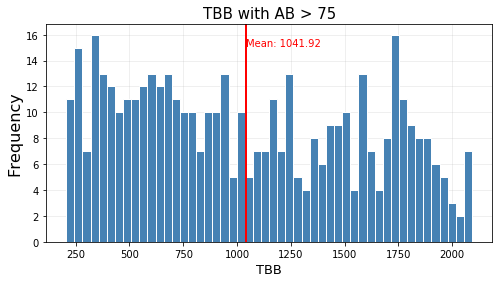

In [8]:
#import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(8,4))
#Histogram of TBB
df.hist(column="TBB", ax=ax, facecolor="steelblue", edgecolor="white", bins=50)
plt.axvline(df['TBB'].mean(), color='red', linestyle='solid', linewidth=2)

_, max_ = plt.ylim()
plt.text(df['TBB'].mean() + df['BPAB'].mean()/10, 
         max_ - max_/10, 
         'Mean: {:.2f}'.format(df['TBB'].mean()),color='red')

# Add a title
ax.set_title("TBB with AB > 75", fontsize=15)

# Add axis labels 
ax.set_xlabel("TBB", fontsize=13)
ax.set_ylabel("Frequency", fontsize=16)

# Make the grid lines lighter and put them behind data 
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

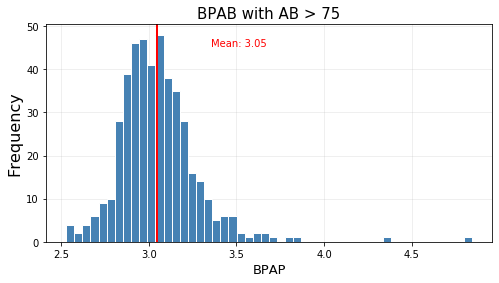

In [9]:
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(8,4))
#Histogram of BPAB
df.hist(column="BPAB", ax=ax, facecolor="steelblue", edgecolor="white", bins=50)
plt.axvline(df['BPAB'].mean(), color='red', linestyle='solid', linewidth=2)

_, max_ = plt.ylim()
plt.text(df['BPAB'].mean() +df['BPAB'].mean()/10, 
         max_ - max_/10, 
         'Mean: {:.2f}'.format(df['BPAB'].mean()),color='red')

# Add a title
ax.set_title("BPAB with AB > 75", fontsize=15)

# Add a title
ax.set_title("BPAB with AB > 75", fontsize=15)

# Add axis labels 
ax.set_xlabel("BPAP", fontsize=13)
ax.set_ylabel("Frequency", fontsize=16)

# Make the grid lines lighter and put them behind data 
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

In [10]:
#MLR from pandas
#you can also use statsmodels for linear regression
import statsmodels.api as sm 
from scipy.special import factorial
# Collect the features in a 2D array 
X = FinalDF[["TBB", "OBP","WAR","BPAB"]]
# Add a constant to the array for the intercept
#You need a good reason if you don't have an intercept
X = sm.add_constant(X)

# The dependent variable is wins, put in an array 
y = FinalDF["salary"]

# Fit the ordinary least-squares (OLS) model 
model = sm.OLS(y, X).fit()

#How good is the fit?
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     19.16
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           2.02e-14
Time:                        17:16:11   Log-Likelihood:                -6820.3
No. Observations:                 402   AIC:                         1.365e+04
Df Residuals:                     397   BIC:                         1.367e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.416e+05    4.7e+06      0.051      0.9

In [11]:
#MLR from pandas
#you can also use statsmodels for linear regression
import statsmodels.api as sm 
# Collect the features in a 2D array 
X = FinalDF[["TBB", "BPAB"]]
# Add a constant to the array for the intercept
#You need a good reason if you don't have an intercept
X = sm.add_constant(X)

# The dependent variable is wins, put in an array 
y = FinalDF["WAR"]

# Fit the ordinary least-squares (OLS) model 
model = sm.OLS(y, X).fit()

#How good is the fit?
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    WAR   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     208.9
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           8.46e-63
Time:                        17:16:11   Log-Likelihood:                -700.26
No. Observations:                 402   AIC:                             1407.
Df Residuals:                     399   BIC:                             1419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9058      0.980     -5.005      0.0

<h1>Results</h1>
As you can see the histogram for TBB was all over the place. It was not normally distrubted at all. This is why we created the second histogram. It normalized TBB/AB to get the BPAB. This gave us a perfect bell curve. 
From running the OLS we 

<h1>Chi-Squared</h1>

= $\sum \frac{(Observed - Expected)^2}{Expected}$

P-Value for Chi-Squared testing: 
https://www.mathsisfun.com/data/chi-square-calculator.html



Helper Functions to Calculate Chi-Square, Expected value, and Table

In [12]:

def chiSquared(observed,expected, N):
    sumProduct = 0
    for row in range(len(observed)):
        for col in range(len(observed[0])): 
            if(expected[row][col] == 0):
                sumProduct += 0
            else:
                sumProduct += pow(observed[row][col] - expected[row][col],2) / expected[row][col]
    return sumProduct

In [13]:
def estimate2(row, col, total):
    #Row * Column / Total
    return((sum(row) * sum(col)) / total)

In [14]:
def tableManipulation(numberOfRows, numberOfColumns, xIncrement, yIncrement, xStart, yStart, DF, x , y):
    saveXStart = xStart
    #Making new Dataframe with DF x and y columnns
    data = {x : DF[x], y : DF[y]}
    combine = pd.DataFrame(data)
    N = 0
    #Matrix with numberOfRows  x  numberOfColumns
    table = [[0 for x in range(numberOfColumns)] for y in range (numberOfRows)]
    for row in range(numberOfRows):
        for col in range(numberOfColumns):
            table[row][col] =  len(combine.loc[(combine[y] > yStart) &  # Lower Y constraint 
                                                 (combine[y] <= yStart+yIncrement) & # Upper Y Constraint
                                                 (combine[x] > xStart) &  #  Lower X Constraint
                                                 (combine[x] <= xStart+ xIncrement)]) #  Upper X Contraint
           # print(table[row][col])
            N +=  table[row][col] #Get total of input data
            xStart += xIncrement # increment column which is Y constraints. Filling table
        xStart = saveXStart #reset X constraint to start at bottom left
        yStart += yIncrement #increment y Constraint to go up one row
    print("Observed Matrix:")
    for i in table:
        print (i)

    numpyArray = np.array(table)
    expected = [[0 for x in range(numberOfColumns)] for y in range (numberOfRows)]
    for row in range(numberOfRows):
        for col in range(numberOfColumns):
            expected[row][col] = estimate2(numpyArray[row] , numpyArray[:,col],N) # Estimate Function
    print("Expected Matrix:")
    for i in expected:
        print (i)



    print("Chi Square Value is: ", chiSquared(table,expected,N))
    print("Degrees of Freedom is (rows - 1 * Col-1) : ", (len(table)  -1 )* (len(table[0]) -1))
    print ("Correlation Coefficient: ",np.corrcoef(DF[x],DF[y]))

1.4943372473869133e-15


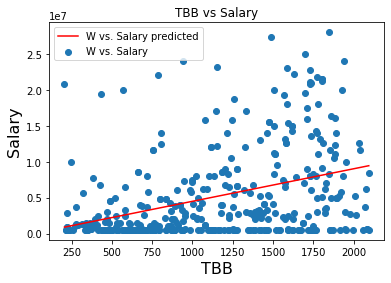

In [15]:
#TBB VS Salary Plot
m, b, rval, pval, stderr = stats.linregress(FinalDF['TBB'], FinalDF['salary'])
print(pval)
y = m * FinalDF['TBB'].copy() + b
x = FinalDF['TBB'].copy()

fig, ax = plt.subplots()
scatter = ax.scatter(x,FinalDF['salary'],marker='o',label="W vs. Salary")
line = ax.plot(x,y, color='red',label="W vs. Salary predicted")
ax.set_xlabel("TBB", fontsize=16)
ax.set_ylabel("Salary", fontsize=16)
ax.set_title("TBB vs Salary")
plt.legend()

In [16]:
tableManipulation(6,9,250,0.5e7,0,0.0,FinalDF,"TBB","salary")
print("Using this information and the above url: we get a pvalue of 6.492e-7")


Observed Matrix:
[9, 44, 53, 48, 28, 33, 26, 20, 6]
[1, 3, 5, 6, 11, 11, 12, 10, 3]
[0, 0, 0, 4, 5, 3, 11, 10, 2]
[0, 1, 1, 0, 3, 4, 7, 4, 0]
[1, 0, 0, 2, 1, 0, 7, 5, 0]
[0, 0, 0, 0, 0, 1, 0, 1, 0]
Expected Matrix:
[7.3059701492537314, 31.880597014925375, 39.1865671641791, 39.850746268656714, 31.880597014925375, 34.53731343283582, 41.843283582089555, 33.208955223880594, 7.3059701492537314]
[1.6965174129353233, 7.402985074626866, 9.099502487562189, 9.253731343283581, 7.402985074626866, 8.019900497512438, 9.716417910447761, 7.711442786069652, 1.6965174129353233]
[0.9577114427860697, 4.17910447761194, 5.13681592039801, 5.223880597014926, 4.17910447761194, 4.527363184079602, 5.485074626865671, 4.353233830845771, 0.9577114427860697]
[0.5472636815920398, 2.388059701492537, 2.9353233830845773, 2.985074626865672, 2.388059701492537, 2.5870646766169156, 3.1343283582089554, 2.487562189054726, 0.5472636815920398]
[0.43781094527363185, 1.9104477611940298, 2.3482587064676617, 2.388059701492537, 1.91

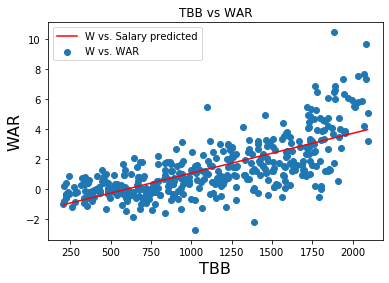

In [17]:
#Table for TBB vs WAR 
m, b, rval, pval, stderr = stats.linregress(FinalDF['TBB'], FinalDF['WAR'])
y = m * FinalDF['TBB'].copy() + b
x = FinalDF['TBB'].copy()

fig, ax = plt.subplots()
scatter = ax.scatter(x,FinalDF['WAR'],marker='o',label="W vs. WAR")
line = ax.plot(x,y, color='red',label="W vs. Salary predicted")
ax.set_xlabel("TBB", fontsize=16)
ax.set_ylabel("WAR", fontsize=16)
ax.set_title("TBB vs WAR")
plt.legend()


In [18]:
tableManipulation(8, 9, 250, 2, 0, -4, FinalDF,"TBB", "WAR")
print("Using this information and the above url: we get a pvalue of 0.0")


Observed Matrix:
[0, 0, 0, 0, 1, 1, 0, 0, 0]
[8, 27, 32, 19, 7, 4, 1, 2, 0]
[3, 21, 26, 38, 28, 26, 30, 11, 0]
[0, 0, 1, 3, 11, 19, 24, 16, 1]
[0, 0, 0, 0, 1, 2, 8, 11, 6]
[0, 0, 0, 0, 0, 0, 0, 9, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 0]
Expected Matrix:
[0.05472636815920398, 0.23880597014925373, 0.2935323383084577, 0.29850746268656714, 0.23880597014925373, 0.25870646766169153, 0.31343283582089554, 0.24875621890547264, 0.05472636815920398]
[2.736318407960199, 11.940298507462687, 14.676616915422885, 14.925373134328359, 11.940298507462687, 12.935323383084578, 15.671641791044776, 12.437810945273633, 2.736318407960199]
[5.007462686567164, 21.850746268656717, 26.85820895522388, 27.313432835820894, 21.850746268656717, 23.671641791044777, 28.67910447761194, 22.761194029850746, 5.007462686567164]
[2.0522388059701493, 8.955223880597014, 11.007462686567164, 11.194029850746269, 8.955223880597014, 9.701492537313433, 11.753731343283581, 9.328358208955224, 2.0522388059701493]
[0.76

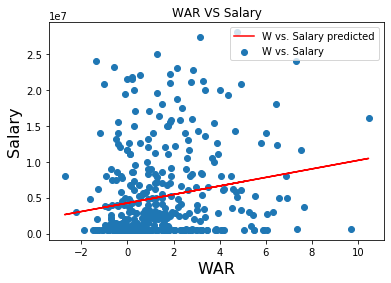

In [19]:
#Plot for War vs Salary and Table
m, b, rval, pval, stderr = stats.linregress(FinalDF['WAR'], FinalDF['salary'])
y = m * FinalDF['WAR'].copy() + b
x = FinalDF['WAR'].copy()

fig, ax = plt.subplots()
scatter = ax.scatter(x,FinalDF['salary'],marker='o',label="W vs. Salary")
line = ax.plot(x,y, color='red',label="W vs. Salary predicted")
ax.set_xlabel("WAR", fontsize=16)
ax.set_ylabel("Salary", fontsize=16)
ax.set_title("WAR VS Salary")
plt.legend()

In [20]:
tableManipulation(6, 8, 2, 0.5e7, -4, 0.0, FinalDF,"WAR", "salary")
print("Using this information and the above url: we get a pvalue of 0.02576")


Observed Matrix:
[1, 78, 125, 42, 13, 7, 1, 0]
[1, 9, 31, 11, 9, 1, 0, 0]
[0, 7, 13, 10, 3, 2, 0, 0]
[0, 2, 8, 7, 1, 1, 0, 1]
[0, 4, 6, 4, 1, 1, 0, 0]
[0, 0, 0, 1, 1, 0, 0, 0]
Expected Matrix:
[1.328358208955224, 66.41791044776119, 121.54477611940298, 49.8134328358209, 18.597014925373134, 7.970149253731344, 0.664179104477612, 0.664179104477612]
[0.30845771144278605, 15.422885572139304, 28.223880597014926, 11.567164179104477, 4.318407960199005, 1.8507462686567164, 0.15422885572139303, 0.15422885572139303]
[0.17412935323383086, 8.706467661691542, 15.932835820895523, 6.529850746268656, 2.4378109452736316, 1.044776119402985, 0.08706467661691543, 0.08706467661691543]
[0.09950248756218906, 4.975124378109452, 9.104477611940299, 3.7313432835820897, 1.3930348258706469, 0.5970149253731343, 0.04975124378109453, 0.04975124378109453]
[0.07960199004975124, 3.9800995024875623, 7.2835820895522385, 2.985074626865672, 1.1144278606965174, 0.47761194029850745, 0.03980099502487562, 0.03980099502487562]
[0.

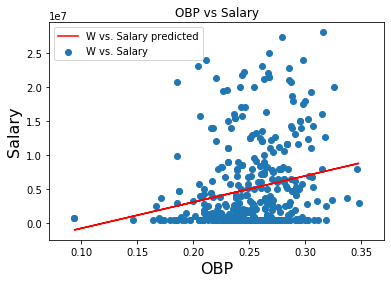

In [21]:
#Plot and Tables for OBP and Salary
m, b, rval, pval, stderr = stats.linregress(FinalDF['OBP'], FinalDF['salary'])
y = m * FinalDF['OBP'].copy() + b
x = FinalDF['OBP'].copy()

fig, ax = plt.subplots()
scatter = ax.scatter(x,FinalDF['salary'],marker='o',label="W vs. Salary")
line = ax.plot(x,y, color='red',label="W vs. Salary predicted")
ax.set_xlabel("OBP", fontsize=16)
ax.set_ylabel("Salary", fontsize=16)
ax.set_title("OBP vs Salary")
plt.legend()

In [22]:
tableManipulation(6, 7, 0.05, 0.5e7, 0.05, 0.0, FinalDF,"OBP", "salary")
print("Using this information and the above url: we get a pvalue of 0.02395")

Observed Matrix:
[2, 1, 22, 119, 111, 12, 0]
[0, 0, 1, 19, 37, 5, 0]
[0, 0, 0, 7, 24, 4, 0]
[0, 0, 0, 10, 5, 5, 0]
[0, 0, 1, 5, 10, 0, 0]
[0, 0, 0, 0, 1, 1, 0]
Expected Matrix:
[1.328358208955224, 0.664179104477612, 15.940298507462687, 106.26865671641791, 124.86567164179104, 17.932835820895523, 0.0]
[0.30845771144278605, 0.15422885572139303, 3.701492537313433, 24.676616915422887, 28.99502487562189, 4.164179104477612, 0.0]
[0.17412935323383086, 0.08706467661691543, 2.08955223880597, 13.930348258706468, 16.3681592039801, 2.3507462686567164, 0.0]
[0.09950248756218906, 0.04975124378109453, 1.1940298507462686, 7.960199004975125, 9.35323383084577, 1.3432835820895523, 0.0]
[0.07960199004975124, 0.03980099502487562, 0.9552238805970149, 6.3681592039801, 7.482587064676617, 1.0746268656716418, 0.0]
[0.009950248756218905, 0.004975124378109453, 0.11940298507462686, 0.7960199004975125, 0.9353233830845771, 0.13432835820895522, 0.0]
Chi Square Value is:  47.169944760911264
Degrees of Freedom is (rows 

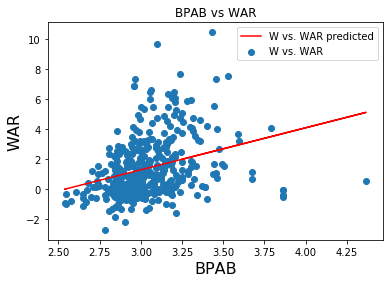

In [23]:
#PLot and table for BPAB vs WAR
m, b, rval, pval, stderr = stats.linregress(FinalDF['BPAB'], FinalDF['WAR'])
y = m * FinalDF['BPAB'].copy() + b
x = FinalDF['BPAB'].copy()

fig, ax = plt.subplots()
scatter = ax.scatter(x,FinalDF['WAR'],marker='o',label="W vs. WAR")
line = ax.plot(x,y, color='red',label="W vs. WAR predicted")
ax.set_xlabel("BPAB", fontsize=16)
ax.set_ylabel("WAR", fontsize=16)
ax.set_title("BPAB vs WAR")
plt.legend()

In [24]:
tableManipulation(8, 8, 0.25, 2, 2.5, -4, FinalDF,"BPAB", "WAR")
print("Using this information and the above url: we get a pvalue of 0.0005096")

Observed Matrix:
[0, 2, 0, 0, 0, 0, 0, 0]
[12, 52, 30, 2, 0, 4, 0, 0]
[9, 81, 73, 16, 3, 0, 0, 1]
[0, 28, 39, 6, 2, 0, 0, 0]
[0, 3, 15, 9, 0, 1, 0, 0]
[0, 3, 7, 1, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
Expected Matrix:
[0.1044776119402985, 0.8407960199004975, 0.8208955223880597, 0.17412935323383086, 0.029850746268656716, 0.024875621890547265, 0.0, 0.004975124378109453]
[5.223880597014926, 42.039800995024876, 41.04477611940298, 8.706467661691542, 1.492537313432836, 1.243781094527363, 0.0, 0.24875621890547264]
[9.559701492537313, 76.93283582089552, 75.11194029850746, 15.932835820895523, 2.7313432835820897, 2.2761194029850746, 0.0, 0.4552238805970149]
[3.917910447761194, 31.529850746268657, 30.78358208955224, 6.529850746268656, 1.1194029850746268, 0.9328358208955224, 0.0, 0.1865671641791045]
[1.462686567164179, 11.771144278606965, 11.492537313432836, 2.4378109452736316, 0.417910447761194, 0.3482587064676617, 0.0, 0.06965174129353234]
[0.6268656716417911, 5.04477611

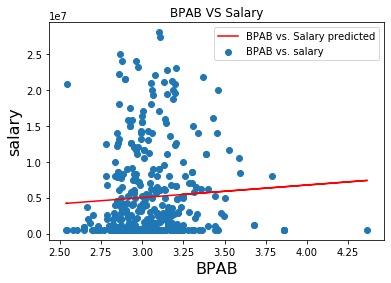

In [25]:
#Plot and Table for BPAB and Salary
m, b, rval, pval, stderr = stats.linregress(FinalDF['BPAB'], FinalDF['salary'])
y = m * FinalDF['BPAB'].copy() + b
x = FinalDF['BPAB'].copy()

fig, ax = plt.subplots()
scatter = ax.scatter(x,FinalDF['salary'],marker='o',label="BPAB vs. salary")
line = ax.plot(x,y, color='red',label="BPAB vs. Salary predicted")
ax.set_xlabel("BPAB", fontsize=16)
ax.set_ylabel("salary", fontsize=16)
ax.set_title("BPAB VS Salary")
plt.legend()

In [26]:
tableManipulation(6, 8, 0.25, 0.5e7, 2.5, 0, FinalDF,"BPAB", "salary")
print("Using this information and the above url: we get a pvalue of 0.7986")

Observed Matrix:
[20, 111, 111, 17, 3, 4, 0, 1]
[0, 27, 23, 10, 1, 1, 0, 0]
[0, 17, 11, 5, 2, 0, 0, 0]
[0, 7, 11, 2, 0, 0, 0, 0]
[1, 7, 7, 1, 0, 0, 0, 0]
[0, 0, 2, 0, 0, 0, 0, 0]
Expected Matrix:
[13.947761194029852, 112.24626865671642, 109.58955223880596, 23.246268656716417, 3.985074626865672, 3.3208955223880596, 0.0, 0.664179104477612]
[3.2388059701492535, 26.064676616915424, 25.44776119402985, 5.398009950248756, 0.9253731343283582, 0.7711442786069652, 0.0, 0.15422885572139303]
[1.828358208955224, 14.713930348258707, 14.365671641791044, 3.0472636815920398, 0.5223880597014925, 0.43532338308457713, 0.0, 0.08706467661691543]
[1.044776119402985, 8.407960199004975, 8.208955223880597, 1.7412935323383085, 0.29850746268656714, 0.24875621890547264, 0.0, 0.04975124378109453]
[0.835820895522388, 6.72636815920398, 6.567164179104478, 1.3930348258706469, 0.23880597014925373, 0.19900497512437812, 0.0, 0.03980099502487562]
[0.1044776119402985, 0.8407960199004975, 0.8208955223880597, 0.17412935323383

<H2>Chi Square Results</H2>
From the results below, we see that the highest positive relationshop between atrributes was TBB and WAR. This is good becuase it tells us that our data that we created is a positive relationship to the one in pybaseball. If we go back to our Confident interval test, which we state in our paper is 95%, we see that the following test fail to reject the null hypothesis meaning they are dependant of on another.

Tests are:

- TBB vs WAR

- TBB vs Salary

- BPAB vs WAR

WAR vs Salary (Figure 1)
-  Correlation = 0.18966693
- Low positive linear relationship
- P Value = 0.2576

OBP vs Salary (Figure 2)
- 0.21880156
- Low positive linear relationship
- P Value = 0.2395

TBB vs WAR (Figure 3)
- 0.70517746
- High positive linear relationship
- P Value = 0 

BPAB vs Salary (Figure 4)
- 0.06144511
- Very low positive linear relationship. 
- Almost no relationship
- P Value = 0.7966

TBB vs Salary (Figure 5)
- 0.3837375
- Medium positive linear relationship
- P Value 6.492e-7

BPAB vs WAR (Figure 6)
- 0.30905767
- Medium positive linear relationship
- P Value = 0.0005096


<h1> Apriori Section </h1>


In [27]:
BSC = batting_stats(2016)
WAR = bwar_bat()

In [28]:
# Init: Get batting and WAR data for particular year
# This may take a minute
BSC = batting_stats(2016)
WAR = bwar_bat()

In [29]:
print('Prior Shape:')
print('BSC shape: ', BSC.shape)
print('WAR shape: ', WAR.shape)

Prior Shape:
BSC shape:  (969, 287)
WAR shape:  (107049, 17)


In [30]:
WAR_2016 = WAR.loc[WAR.year_ID == 2016]
WAR_2016 = WAR_2016.dropna()

# dropping some attributes
WAR_clean = WAR_2016.iloc[:,[0,1,2,4,7,10,11,14,16]].reset_index()
print('Clean WAR shape: ',WAR_clean.shape)

Clean WAR shape:  (770, 10)


In [31]:
import numpy as np

In [32]:
'''
HELPER FUNCTION
Maps value into Very Low to Very High [VL,L,H,VH] based on 1st and 3rd quartile and median.
Args:
  x : value to be mapped
  s : series of which values originate
'''
def mapVal(x,s):
    q = np.quantile(s, [0,.25,.50,.75,1])
    name = s.name
    # Very High - above 3rd quartile
    if x > q[3]: 
        return('VH '+ name)
    
    # High - above median, exclusive
    elif x <= q[3] and x > q[2]: 
        return('H '+ name)
    
    # Low - above 1st quartile, exclusive
    elif x <= q[2] and x > q[1]: 
        return('L '+ name)
    
    # Very Low - below 1st quartile, inclusive
    elif x <= q[1]: 
        return('VL '+ name)    

In [35]:
# map WAR
m = WAR_clean.loc[:,'WAR'].apply(lambda x: mapVal(x,WAR_clean.WAR))
WAR_clean['WAR_c'] = m

# map salary
m = WAR_clean.loc[:,'salary'].apply(lambda x: mapVal(x,WAR_clean.salary))
WAR_clean['salary_c'] = m

# map RRA
m = WAR_clean.loc[:,'runs_above_avg'].apply(lambda x: mapVal(x,WAR_clean.runs_above_avg))
WAR_clean['RRA_c'] = m

WAR_clean.head()

index       name_common    mlb_ID  player_ID team_ID pitcher      salary  \
0     61     Fernando Abad  472551.0   abadfe01     BOS       Y   1250000.0   
1    235        Jose Abreu  547989.0  abreujo02     CHW       N  13334000.0   
2    310     Dustin Ackley  554429.0  ackledu01     NYY       N   3200000.0   
3    359  Cristhian Adames  542436.0  adamecr01     COL       N    509500.0   
4    466        Matt Adams  571431.0  adamsma01     STL       N   1650000.0   

   runs_above_avg  WAR_rep   WAR   WAR_c   salary_c              RRA_c  
0             0.0     0.00  0.00   L WAR   L salary   L runs_above_avg  
1             1.9     2.36  2.68  VH WAR  VH salary  VH runs_above_avg  
2            -5.0     0.24 -0.29  VL WAR   H salary  VL runs_above_avg  
3           -10.9     0.80 -0.41  VL WAR  VL salary  VL runs_above_avg  
4            -2.0     1.02  0.73   H WAR   L salary   L runs_above_avg

In [36]:
# Players grouped by WAR category
# WAR_VH = WAR_clean.loc[WAR_clean.WAR_c == 'VH'] 
# WAR_H = WAR_clean.loc[WAR_clean.WAR_c == 'H'] 
# WAR_L = WAR_clean.loc[WAR_clean.WAR_c == 'L'] 
# WAR_VL = WAR_clean.loc[WAR_clean.WAR_c == 'VL'] 

In [37]:
'''
Clean BSC data and map to scale
'''
BSC_clean = BSC.dropna(axis=1)
BSC_clean = BSC_clean.dropna().reset_index()
BSC_clean.drop(['index','Season','Dol','Age Rng'],axis=1,inplace=True)

# init new dataframe for mapped values
BSC_categ = BSC_clean.iloc[:,:3]
for x in BSC_clean.columns[3:]:
    # map
    BSC_categ[x] = BSC_clean.loc[:,x].apply(lambda y: mapVal(y,BSC_clean.loc[:,x]))
print('Clean BSC shape: ',BSC_clean.shape)

Clean BSC shape:  (969, 79)


In [38]:
'''
Perform Apriori on BSC_categ to identify frequent itemsets and association rules.
'''
BSC_categ['basket'] = BSC_categ.iloc[:,3:].apply(lambda x: set(x).union(x), axis=1)
BSC_categ.head()

Name       Team   Age     G     AB     PA     H     1B     2B  \
0      Mike Trout     Angels  24.0  VH G  VH AB  VH PA  VH H  VH 1B  VH 2B   
1    Mookie Betts    Red Sox  23.0  VH G  VH AB  VH PA  VH H  VH 1B  VH 2B   
2     Kris Bryant       Cubs  24.0  VH G  VH AB  VH PA  VH H  VH 1B  VH 2B   
3  Josh Donaldson  Blue Jays  30.0  VH G  VH AB  VH PA  VH H  VH 1B  VH 2B   
4    Corey Seager    Dodgers  22.0  VH G  VH AB  VH PA  VH H  VH 1B  VH 2B   

      3B                        ...                             Swing% (pfx)  \
0  VH 3B                        ...                          VL Swing% (pfx)   
1  VH 3B                        ...                          VL Swing% (pfx)   
2  VH 3B                        ...                           H Swing% (pfx)   
3  VH 3B                        ...                          VL Swing% (pfx)   
4  VH 3B                        ...                          VH Swing% (pfx)   

      Zone% (pfx)     Def     wSB     Off     Lg     TTO%     Swing% (pi)  \
0  VL Zone% (pfx)  VH Def  VH wSB  VH Off  VH Lg   H TTO%  VL Swing% (pi)   
1   H Zone% (pfx)  VH Def  VH wSB  VH Off  VH Lg  VL TTO%  VL Swing% (pi)   
2  VL Zone% (pfx)  VH Def  VL wSB  VH Off  VH Lg   H TTO%   H Swing% (pi)   
3  VL Zone% (pfx)  VH Def  VH wSB  VH Off  VH Lg   H TTO%  VL Swing% (pi)   
4  VL Zone% (pfx)  VH Def  VL wSB  VH Off   H Lg   L TTO%  VH Swing% (pi)   

      Zone% (pi)                                             basket  
0  VL Zone% (pi)  {H pLI, L K%, VH Balls, VL BUH%, VH AB, VH wOB...  
1   H Zone% (pi)  {H pLI, VH Balls, VH AB, VH wOBA, VH LD, VH IF...  
2  VL Zone% (pi)  {L K%, VH Balls, VL BUH%, VH LD%, VH AB, VH wO...  
3  VL Zone% (pi)  {H pLI, VH Balls, VL BUH%, VH AB, VH wOBA, VH ...  
4  VL Zone% (pi)  {L K%, VH Balls, VL BUH%, H GB/FB, VH LD%, VH ...  

[5 rows x 80 columns]

**Prefix Scale**

- VL : Very Low
- L : Low
- H : High
- VH : Very High

**Acronym Translations**

Complete list found here: https://library.fangraphs.com/offense/offensive-statistics-list/


- wSB : Weighted Stolen Base
- SB : Stolen Base
- 3B : Triple
- BUH/BUH% : Bunt Hit (percentage)
- CS : Caught Stealing
- IBB : Intentional Walk
- HBP : Hit-by-Pitch
- SF : Sacrafice Fly
- HR : Home Run
- HR/FB : Home Run/Fly Ball

**Itemset Interpretation**

Frequent levels (VL to VH) of a particular attribute. These indicate frequent scales of statistics on a per player basis. This gives us common attributes amongst players that may indicate which attributes we may or may not use to distinguish good and bad players. Most, if not all of these frequent items are on the scale of VL to L, but this may be a result of chosen min_supp and min_conf. Other insights pending...


In [39]:
# gives both frequent itemsets and rules
itemsets, rules = apriori(BSC_categ.basket,.28,.95) # min_supp, min_conf

In [40]:
# super set of attributes and scales that are common - run of the mill players
freqSets = itemsets[max(itemsets.keys())].keys()
SS = set()

for x in freqSets:
    SS = SS.union(set(x))
print(SS)

{'VL HBP', 'L wSB', 'VL CS', 'VL IBB', 'VL SF', 'VL BUH%', 'VL BB/K', 'L BsR', 'VL RBI', 'VL IFFB', 'VL IFH%', 'VL 1B', 'VL HR', 'VL BUH', 'VL HR/FB', 'VL LD', 'VL ISO', 'VL BB%', 'VL Lg', 'VL wRC', 'VL GDP', 'VL BB', 'VL PH', 'VL FB', 'VL IFFB%', 'VL SB', 'VL 3B', 'VL IFH', 'VL 2B'}


In [41]:
# remove run of the mill players 
SS = list(SS)
BSC_filter = BSC_categ

for x in SS:
    # get key
    y = x[2:]
    y = y.strip()
    
    toDrop = BSC_filter.loc[BSC_filter[y] == x]
    BSC_filter.drop(toDrop.index,inplace = True)

BSC_filter.shape

(43, 80)

In [42]:
goodPlayers = WAR_2016.loc[WAR_2016.name_common.isin(BSC_filter.Name)]
badPlayers = WAR_2016.loc[~WAR_2016.name_common.isin(BSC_filter.Name)]

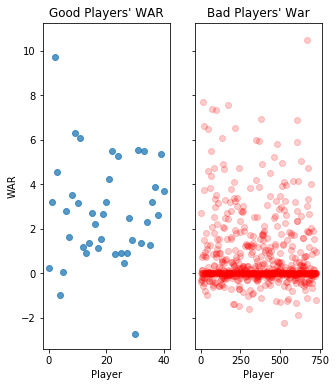

In [43]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(5,6))

ax[0].set_title('Good Players\' WAR')
ax[0].set_ylabel('WAR')
ax[0].set_xlabel('Player')
ax[0].scatter(np.arange(goodPlayers.shape[0]),goodPlayers.WAR,alpha=.75)

ax[1].set_title('Bad Players\' War')
ax[1].set_xlabel('Player')
ax[1].scatter(np.arange(badPlayers.shape[0]),badPlayers.WAR,color='r',alpha=.2)
plt.show()

In [44]:
'''
Hypothesis testing - Difference of means of good players gp and bad players bp
H_0: mu_gp - mu_bp = 0
H_1: mu_gp - mu_gp != 0
'''
# significance level of 95%
alpha = 0.05
mu_gp = goodPlayers.WAR.mean()
mu_bp = badPlayers.WAR.mean()
std_gp = goodPlayers.WAR.std()
std_bp = badPlayers.WAR.std()

num = mu_gp - mu_bp
den = (std_gp**2 / goodPlayers.shape[0]) + (std_bp**2 / badPlayers.shape[0])
z = num / np.sqrt(den)

# two tail test pval = 2*phi(-|z|)
p = 2* stats.norm.cdf(-np.abs(z))

In [45]:
np.round(p,5) #significant difference!

0.0

In [46]:
print('Population Means:',mu_gp,mu_bp)
print('Population stds:',std_gp,std_bp)
print('P = ',p)

Population Means: 2.705853658536586 0.607064471879287
Population stds: 2.29205472841483 1.4808909730747826
P =  6.808708464548006e-09


In [47]:
'''
Exploratory:
Confirm results by reducing size of WAR dataset to have only those in BSC.
'''
# Reduce down to match individuals we have data on
WAR_reduced = WAR_2016.loc[WAR_2016.name_common.isin(BSC.Name)]
WAR_reduced.head()

name_common    mlb_ID  player_ID  year_ID team_ID  stint_ID lg_ID  \
61      Fernando Abad  472551.0   abadfe01     2016     BOS         2    AL   
235        Jose Abreu  547989.0  abreujo02     2016     CHW         1    AL   
310     Dustin Ackley  554429.0  ackledu01     2016     NYY         1    AL   
359  Cristhian Adames  542436.0  adamecr01     2016     COL         1    NL   
466        Matt Adams  571431.0  adamsma01     2016     STL         1    NL   

    pitcher    G     PA      salary  runs_above_avg  runs_above_avg_off  \
61        Y    2    0.0   1250000.0             0.0                 0.0   
235       N  159  695.0  13334000.0             1.9                 6.9   
310       N   28   70.0   3200000.0            -5.0                -8.0   
359       N  121  256.0    509500.0           -10.9               -11.9   
466       N  118  327.0   1650000.0            -2.0                -3.0   

     runs_above_avg_def  WAR_rep   WAA   WAR  
61                  0.0     0.00  0.00  0.00  
235               -14.0     2.36  0.32  2.68  
310                 1.6     0.24 -0.53 -0.29  
359                 4.0     0.80 -1.21 -0.41  
466                -2.6     1.02 -0.29  0.73

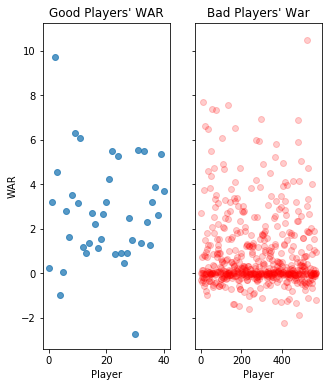

In [49]:
goodPlayers = WAR_reduced.loc[WAR_reduced.name_common.isin(BSC_filter.Name)]
badPlayers = WAR_reduced.loc[~WAR_reduced.name_common.isin(BSC_filter.Name)]

fig,ax = plt.subplots(1,2,sharey=True,figsize=(5,6))

ax[0].set_title('Good Players\' WAR')
ax[0].set_ylabel('WAR')
ax[0].set_xlabel('Player')
ax[0].scatter(np.arange(goodPlayers.shape[0]),goodPlayers.WAR,alpha=.75)

ax[1].set_title('Bad Players\' War')
ax[1].set_xlabel('Player')
ax[1].scatter(np.arange(badPlayers.shape[0]),badPlayers.WAR,color='r',alpha=.2)
plt.show()

In [50]:
'''
Hypothesis testing - Difference of means of good players gp and bad players bp
H_0: mu_gp - mu_bp = 0
H_1: mu_gp - mu_gp != 0
'''
# significance level of 95%
alpha = 0.05
mu_gp = goodPlayers.WAR.mean()
mu_bp = badPlayers.WAR.mean()
std_gp = goodPlayers.WAR.std()
std_bp = badPlayers.WAR.std()

num = mu_gp - mu_bp
den = (std_gp**2 / goodPlayers.shape[0]) + (std_bp**2 / badPlayers.shape[0])
z = num / np.sqrt(den)

# two tail test pval = 2*phi(-|z|)
p = 2* stats.norm.cdf(-np.abs(z))

In [51]:
print('Population Means:',mu_gp,mu_bp)
print('Population stds:',std_gp,std_bp)
print('P = ',p)

Population Means: 2.705853658536586 0.7732631578947373
Population stds: 2.29205472841483 1.6351738595674943
P =  1.1408511699663287e-07


<h2> Results for Apriori </h2>

In using Apriori to find frequent sets of common offensive batting stats, we are able to distinguish above average players from the population. Apriori reveals the most frequently occuring statistical ranges which most players fall in to which can be used as a filter for what the average player may look like. Removing those who posses average, frequent offensive stats, we are left with players who do not meet the norm. Whether this means we have the above average players or below average players is tested and confirmed through a standard Z test of the differences of mean WAR amongst the two populations. 

In [52]:
print('Good Players:',goodPlayers.shape[0])
print('Average Players:',badPlayers.shape[0])

Good Players: 41
Average Players: 570


In [53]:
print('Largest Frequent Itemset is length =',max(itemsets.keys()))

Largest Frequent Itemset is length = 8


In [54]:
print('Mean:')
print('Good:',mu_gp,'Bad:',mu_bp)
print('\nStandard Deviation')
print('Good:',std_gp,'Bad:',std_bp)
print('P = ',p,'=',np.round(p,6))

Mean:
Good: 2.705853658536586 Bad: 0.7732631578947373

Standard Deviation
Good: 2.29205472841483 Bad: 1.6351738595674943
P =  1.1408511699663287e-07 = 0.0


<H1>Problem: Does Salary = Good Player</H1>
    Using TBB,BPAB, and WAR
    linear regression 

In [55]:
def linearRegressionModelOutPut(df,indep,dep):
    X = df[indep]
    X = sm.add_constant(X)
    y = df[dep]
    model = sm.OLS(y,X).fit()
    print(model.summary())
    print ("Correlation Coefficient: ",np.corrcoef(df[indep],df[dep]))
    

In [56]:
#top 10 MLB Salaries in 2016. Ascending Order
print(FinalDF[['mlb_name','salary']].sort_values(by=['salary'] ).tail(10))

            mlb_name    salary
275       Jose Reyes  22000000
89      Justin Upton  22125000
69    Hanley Ramirez  22750000
102        Joe Mauer  23000000
196    Mark Teixeira  23125000
235   Prince Fielder  24000000
17     Robinson Cano  24000000
80     Albert Pujols  25000000
125  Yoenis Cespedes  27328046
37    Miguel Cabrera  28000000


RSquared = model explains % of the variance in our dependent variable. As we add more variables R2 gets bigger

In [57]:
linearRegressionModelOutPut(FinalDF,"salary","TBB")

                            OLS Regression Results                            
Dep. Variable:                    TBB   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     69.07
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           1.49e-15
Time:                        17:19:16   Log-Likelihood:                -3054.6
No. Observations:                 402   AIC:                             6113.
Df Residuals:                     400   BIC:                             6121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        966.2084     31.281     30.888      0.0

In [58]:
linearRegressionModelOutPut(FinalDF,"salary","WAR")

                            OLS Regression Results                            
Dep. Variable:                    WAR   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     14.93
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           0.000130
Time:                        17:19:16   Log-Likelihood:                -836.90
No. Observations:                 402   AIC:                             1678.
Df Residuals:                     400   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0954      0.126      8.714      0.0

In [59]:
linearRegressionModelOutPut(FinalDF,"salary","BPAB")

                            OLS Regression Results                            
Dep. Variable:                   BPAB   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.516
Date:                Thu, 12 Dec 2019   Prob (F-statistic):              0.219
Time:                        17:19:16   Log-Likelihood:                 44.424
No. Observations:                 402   AIC:                            -84.85
Df Residuals:                     400   BIC:                            -76.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0337      0.014    216.137      0.0

<h2> Problem 1 Results:</h2>

If we look at the data, TBB has a better Rsquared value when it comes down to all three values. We can say that the model using TBB explains 14.7% of the variance in the dependant variable which was TBB. It also had a correlation coefficient of 0.38 which is positive linear correlation. Better than the other two

<H1>Problem: Does Age = Performance</H1>
    Linear regression with TBB,BPAP and WAR

In [60]:
#making an Age column for players
people = pybaseball.master()
FinalDF = fin = pd.merge(df,WarSal,on=('playerID'))
FinalDF = pd.merge(FinalDF,people[['playerID','birthYear']],on=('playerID'))
FinalDF['Age'] = 2019 - FinalDF['birthYear']
#FinalDF.head(20)

In [61]:
linearRegressionModelOutPut(FinalDF,"Age","TBB")

                            OLS Regression Results                            
Dep. Variable:                    TBB   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3464
Date:                Thu, 12 Dec 2019   Prob (F-statistic):              0.556
Time:                        17:19:18   Log-Likelihood:                -3086.5
No. Observations:                 402   AIC:                             6177.
Df Residuals:                     400   BIC:                             6185.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1264.4736    227.393      5.561      0.0

In [62]:
linearRegressionModelOutPut(FinalDF,"Age","WAR")

                            OLS Regression Results                            
Dep. Variable:                    WAR   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     9.431
Date:                Thu, 12 Dec 2019   Prob (F-statistic):            0.00228
Time:                        17:19:18   Log-Likelihood:                -839.58
No. Observations:                 402   AIC:                             1683.
Df Residuals:                     400   BIC:                             1691.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9970      0.850      4.703      0.0

In [63]:
linearRegressionModelOutPut(FinalDF,"Age","BPAB")

                            OLS Regression Results                            
Dep. Variable:                   BPAB   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1012
Date:                Thu, 12 Dec 2019   Prob (F-statistic):              0.751
Time:                        17:19:18   Log-Likelihood:                 43.715
No. Observations:                 402   AIC:                            -83.43
Df Residuals:                     400   BIC:                            -75.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0746      0.094     32.559      0.0

<h2>Problem 2 Results: </h2>

Age does not seem to be a factor when it comes to determining the performance of a player. Looking at the three regression models, not only is the R squared value low, but the correlation coeeficient gotten from the information is negative and/or close to 0. This tells us that there is no correlation for the one that is close to 0 and a negative correlation for all others.